In [1]:
import pandas as pd 
import numpy as np

In [2]:
from typing import List, Optional
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as st
from scipy.stats import probplot, ks_2samp

from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
import missingno as msno
import xgboost as xgb
%matplotlib inline

In [3]:
test = pd.read_csv('C:/Users/Anatoly/Desktop/Тестовое задание LICARD DS/DATA/contest_test.csv')

In [4]:
train = pd.read_csv('C:/Users/Anatoly/Desktop/Тестовое задание LICARD DS/DATA/contest_train.csv')

In [5]:
train.shape, test.shape

((18390, 262), (6131, 261))

In [6]:
test.head()

ID  FEATURE_0  FEATURE_1  FEATURE_2  FEATURE_3  FEATURE_4  \
0    84728433        0.0        0.0        0.0        0.0        0.0   
1   335016156        0.0        0.0        0.0        0.0        0.0   
2  1163752045       16.0        4.0        0.0        0.0        0.0   
3    84929758        2.0        1.0        0.0        0.0        0.0   
4   143090121        2.0        1.0        0.0        0.0        1.0   

   FEATURE_5  FEATURE_6   FEATURE_7    FEATURE_8  ...  FEATURE_250  \
0        0.0        0.0   35.265322   110.813724  ...          0.0   
1        0.0        0.0   51.316538    14.427879  ...          0.0   
2        0.0        1.0  457.087009  1172.556882  ...        131.0   
3        0.0        0.0   29.672314    58.511494  ...          0.0   
4        0.0        0.0  522.148408  2724.481080  ...         50.0   

   FEATURE_251  FEATURE_252  FEATURE_253  FEATURE_254  FEATURE_255  \
0          0.0   436.883761   427.497873          0.0          1.0   
1          0.0    53.400612    58.863404          1.0          1.0   
2        151.0   217.419547   490.478263          0.0          1.0   
3          0.0   657.453708   692.191717          1.0          1.0   
4        188.0  1253.064074  1670.514312          0.0          1.0   

   FEATURE_256  FEATURE_257  FEATURE_258  FEATURE_259  
0          0.0          1.0          1.0          1.0  
1          0.0          1.0          1.0          1.0  
2          0.0          1.0          1.0          1.0  
3          0.0          2.0          1.0          1.0  
4          0.0          1.0          1.0          2.0  

[5 rows x 261 columns]

In [7]:
train.head()

ID  FEATURE_0  FEATURE_1  FEATURE_2  FEATURE_3  FEATURE_4  \
0   737005990        2.0        2.0        0.0        0.0        0.0   
1   336625142        2.0        1.0        0.0        0.0        0.0   
2  1146317240       12.0        5.0        0.0        0.0        0.0   
3  1152334700       59.0        5.0        0.0        0.0        0.0   
4  1148871905        1.0        1.0        0.0        0.0        0.0   

   FEATURE_5  FEATURE_6  FEATURE_7  FEATURE_8  ...  FEATURE_251  FEATURE_252  \
0        0.0        0.0 -13.093355  22.223191  ...          0.0    65.729608   
1        0.0        0.0   1.920928 -14.228085  ...          0.0    70.623966   
2        0.0        0.0 -62.402398 -18.135059  ...          1.0   475.810787   
3        0.0        0.0 -25.523791 -11.967182  ...          0.0   140.543320   
4        0.0        0.0 -14.628149 -23.565047  ...          2.0   417.804418   

   FEATURE_253  FEATURE_254  FEATURE_255  FEATURE_256  FEATURE_257  \
0    68.566610          0.0          0.0          0.0          1.0   
1    72.159259          1.0          0.0          0.0          1.0   
2   603.267435          1.0          1.0          0.0          2.0   
3   212.539669          1.0          1.0          0.0          1.0   
4   430.329005          0.0          1.0          0.0          1.0   

   FEATURE_258  FEATURE_259  TARGET  
0          1.0          1.0       0  
1          1.0          1.0       0  
2          1.0          1.0       2  
3          1.0          2.0       0  
4          2.0          1.0       1  

[5 rows x 262 columns]

In [8]:
print("train.shape = {} rows, {} cols".format(*train.shape))
print("test.shape = {} rows, {} cols".format(*test.shape))

train.shape = 18390 rows, 262 cols
test.shape = 6131 rows, 261 cols


In [9]:
train.describe()

ID     FEATURE_0     FEATURE_1     FEATURE_2  FEATURE_3  \
count  1.839000e+04  18390.000000  18390.000000  18390.000000    18390.0   
mean   1.396406e+09      5.486678      1.331811      0.057205        0.0   
std    1.990785e+09     14.997055      1.814098      0.232240        0.0   
min    1.428335e+07      0.000000      0.000000      0.000000        0.0   
25%    4.502009e+08      0.000000      0.000000      0.000000        0.0   
50%    7.450719e+08      1.000000      1.000000      0.000000        0.0   
75%    1.152484e+09      5.000000      2.000000      0.000000        0.0   
max    1.043892e+10    385.000000     31.000000      1.000000        0.0   

          FEATURE_4     FEATURE_5     FEATURE_6     FEATURE_7     FEATURE_8  \
count  18390.000000  18390.000000  18390.000000  18390.000000  17497.000000   
mean       0.142904      0.000218      0.011854     81.678910    280.978012   
std        0.349984      0.014747      0.108233    255.963629   1216.091350   
min        0.000000      0.000000      0.000000   -171.709797   -297.065679   
25%        0.000000      0.000000      0.000000     -9.696251    -20.896074   
50%        0.000000      0.000000      0.000000      3.785448      4.072580   
75%        0.000000      0.000000      0.000000     27.932972     37.599829   
max        1.000000      1.000000      1.000000   3147.341440   9963.242114   

       ...   FEATURE_251   FEATURE_252   FEATURE_253   FEATURE_254  \
count  ...  18390.000000  18390.000000  18390.000000  18390.000000   
mean   ...     36.899184    309.066259    410.670275      0.612616   
std    ...    107.739739    261.860609    352.946932      0.487166   
min    ...   -667.000000  -1531.063435   -328.361649      0.000000   
25%    ...      0.000000    129.779522    180.865345      0.000000   
50%    ...      0.000000    265.303217    328.520091      1.000000   
75%    ...     10.000000    410.531959    536.494252      1.000000   
max    ...   3194.000000   3600.484621   4422.926802      1.000000   

        FEATURE_255  FEATURE_256   FEATURE_257   FEATURE_258   FEATURE_259  \
count  18390.000000      18390.0  18390.000000  18390.000000  18390.000000   
mean       0.641871          0.0      1.138662      1.183578      1.185481   
std        0.479463          0.0      0.372706      0.405133      0.401904   
min        0.000000          0.0      1.000000      0.000000      1.000000   
25%        0.000000          0.0      1.000000      1.000000      1.000000   
50%        1.000000          0.0      1.000000      1.000000      1.000000   
75%        1.000000          0.0      1.000000      1.000000      1.000000   
max        1.000000          0.0      3.000000      3.000000      3.000000   

             TARGET  
count  18390.000000  
mean       0.352637  
std        0.592067  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        2.000000  

[8 rows x 262 columns]

## Анализ целевой переменной

Mean-target: 0.3526


c:\users\anatoly\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\anatoly\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\anatoly\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit key

Text(0, 0.5, 'Index')

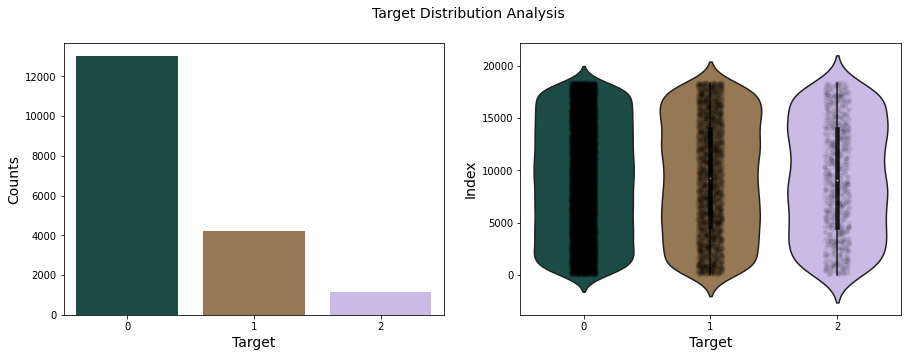

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.suptitle("Target Distribution Analysis", size=14)
print(f"Mean-target: {round(train.TARGET.mean(), 4)}")

sns.countplot(train.TARGET, ax=axes[0], palette="cubehelix")
sns.violinplot(train.TARGET, train.index, ax=axes[1], palette="cubehelix")
sns.stripplot(train.TARGET, train.index, jitter=True, ax=axes[1], color="black", alpha=0.05) #диаграмма рассеяния

axes[0].set_xlabel("Target", fontsize=14)
axes[0].set_ylabel("Counts", fontsize=14)
axes[1].set_xlabel("Target", fontsize=14)
axes[1].set_ylabel("Index", fontsize=14)

`Выводы:` у нас три категории, распределение которых равномерно по всему датасету (смотри stripplot), класс 2 несбалансирован как и класс 1. Тем не менее будем решать задачу многоклассовой классификации.  Какие-то манипуляции с данными для выравнивания баланса классов, в качестве приоритетных гипотез, рассматриваться не будут. 

In [11]:
train.TARGET.value_counts(normalize=True)

0    0.708483
1    0.230397
2    0.061120
Name: TARGET, dtype: float64

## EDA

In [12]:
numerical_features = train.select_dtypes(include=[np.number])
print(f"count of numeric_features {numerical_features.shape[1]}")

numerical_features.columns

count of numeric_features 262


Index(['ID', 'FEATURE_0', 'FEATURE_1', 'FEATURE_2', 'FEATURE_3', 'FEATURE_4',
       'FEATURE_5', 'FEATURE_6', 'FEATURE_7', 'FEATURE_8',
       ...
       'FEATURE_251', 'FEATURE_252', 'FEATURE_253', 'FEATURE_254',
       'FEATURE_255', 'FEATURE_256', 'FEATURE_257', 'FEATURE_258',
       'FEATURE_259', 'TARGET'],
      dtype='object', length=262)

`Вывод:` категориальных фичей и фичей связанных со временем у нас нет. Продолжаем работать с числовыми фичами. Поправка: поскольку датасет уже обработан, то в дискретных фичах могут уже присутствовать категориальные. На это нужно обратить внимание. 

## Анализ числовых переменных

## Дискретные признаки

In [13]:
discrete_feature = [
    feature for feature in numerical_features
    if len(train[feature].unique())<25 
]

print(f"Discrete Variables Count: {len(discrete_feature)}")

Discrete Variables Count: 50


In [14]:
train[discrete_feature].head()

FEATURE_1  FEATURE_2  FEATURE_3  FEATURE_4  FEATURE_5  FEATURE_6  \
0        2.0        0.0        0.0        0.0        0.0        0.0   
1        1.0        0.0        0.0        0.0        0.0        0.0   
2        5.0        0.0        0.0        0.0        0.0        0.0   
3        5.0        0.0        0.0        0.0        0.0        0.0   
4        1.0        0.0        0.0        0.0        0.0        0.0   

   FEATURE_9  FEATURE_10  FEATURE_11  FEATURE_14  ...  FEATURE_219  \
0        0.0         0.0         0.0         3.0  ...          1.0   
1        0.0         0.0         0.0         1.0  ...          2.0   
2        0.0         0.0         0.0         7.0  ...          1.0   
3        0.0         0.0         0.0         2.0  ...          2.0   
4        0.0         0.0         0.0         1.0  ...          2.0   

   FEATURE_220  FEATURE_249  FEATURE_254  FEATURE_255  FEATURE_256  \
0          1.0          0.0          0.0          0.0          0.0   
1          1.0          0.0          1.0          0.0          0.0   
2          3.0          0.0          1.0          1.0          0.0   
3          2.0          0.0          1.0          1.0          0.0   
4          1.0          0.0          0.0          1.0          0.0   

   FEATURE_257  FEATURE_258  FEATURE_259  TARGET  
0          1.0          1.0          1.0       0  
1          1.0          1.0          1.0       0  
2          2.0          1.0          1.0       2  
3          1.0          1.0          2.0       0  
4          1.0          2.0          1.0       1  

[5 rows x 50 columns]

In [15]:
train_descr = train[discrete_feature]

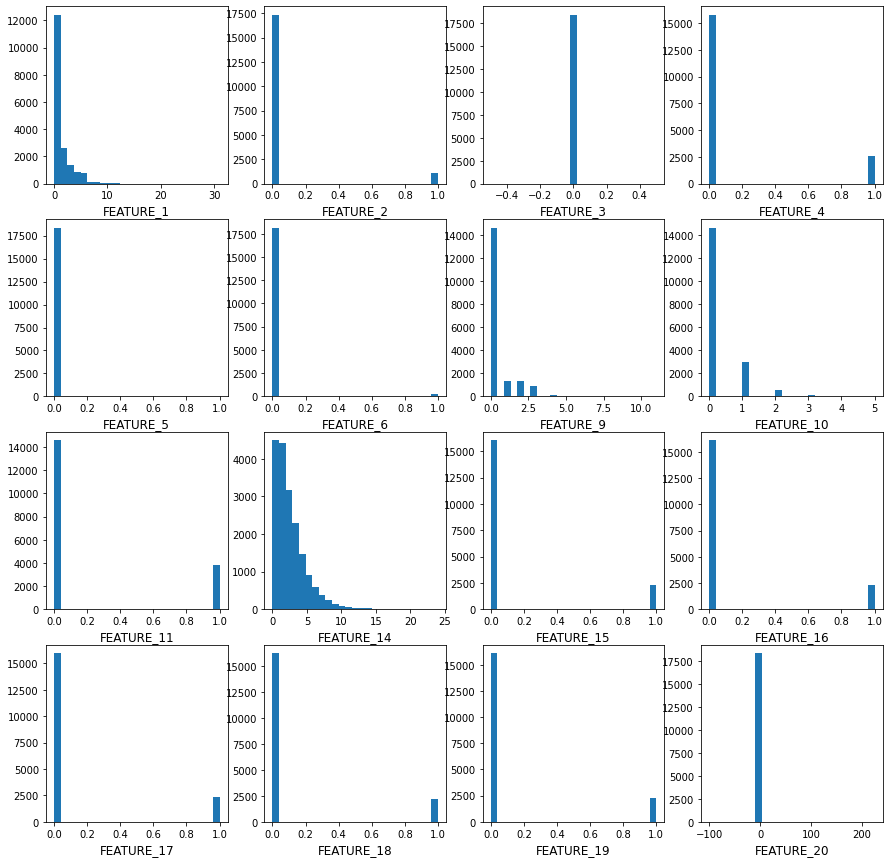

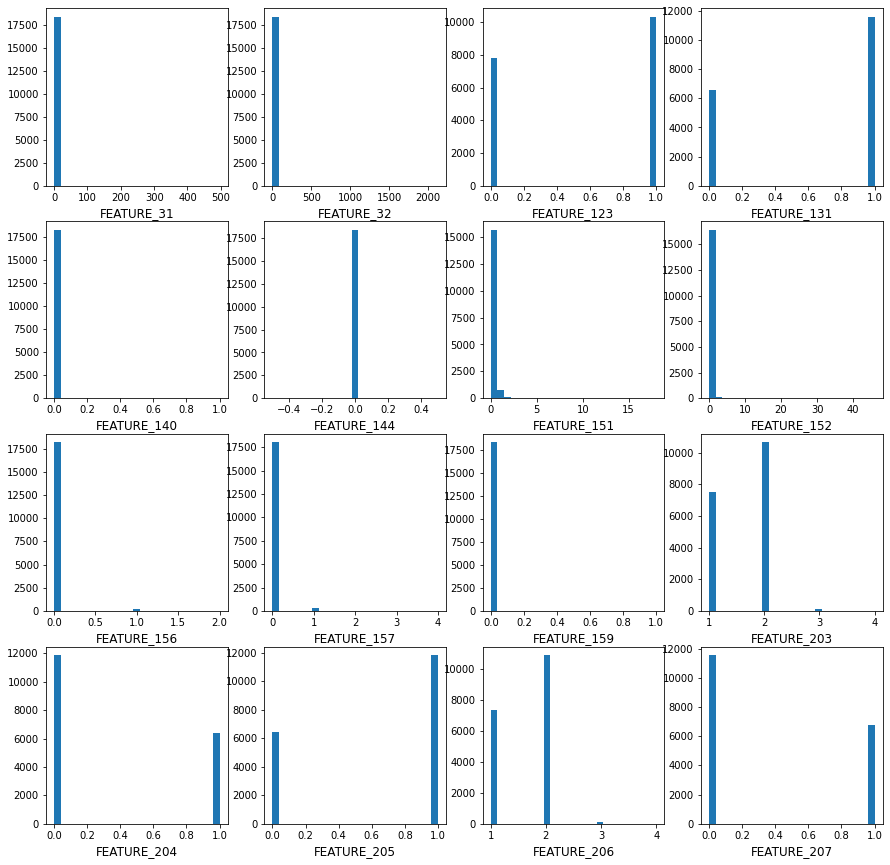

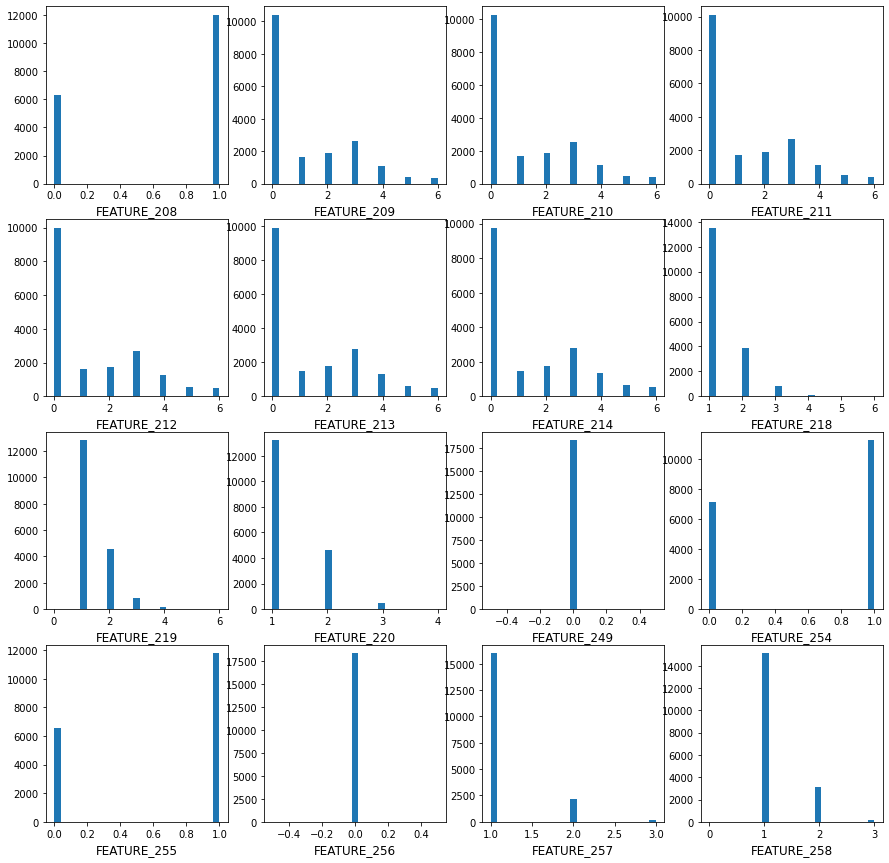

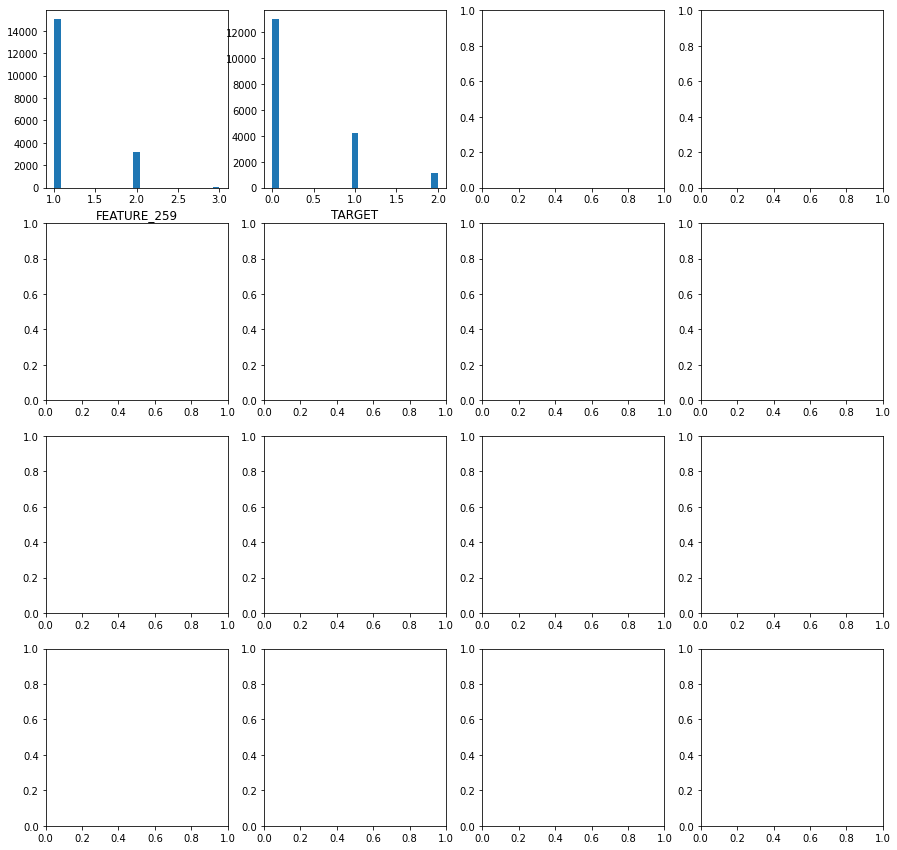

In [16]:
# Визуализация трейновой выборки в виде гистограмм признаков
for i in range(4):
    fig, axes = plt.subplots(4, 4, figsize=(15, 15))

    for num, feature in enumerate(train[discrete_feature].iloc[:, i*16:(i+1)*16]):
        data_train = train[feature].copy()
        axes[num//4, num%4].hist(data_train, bins=25)
        axes[num//4, num%4].set_xlabel(feature, fontsize=12)

c:\users\anatoly\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\anatoly\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\anatoly\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\anatoly\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\anatoly\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, Use

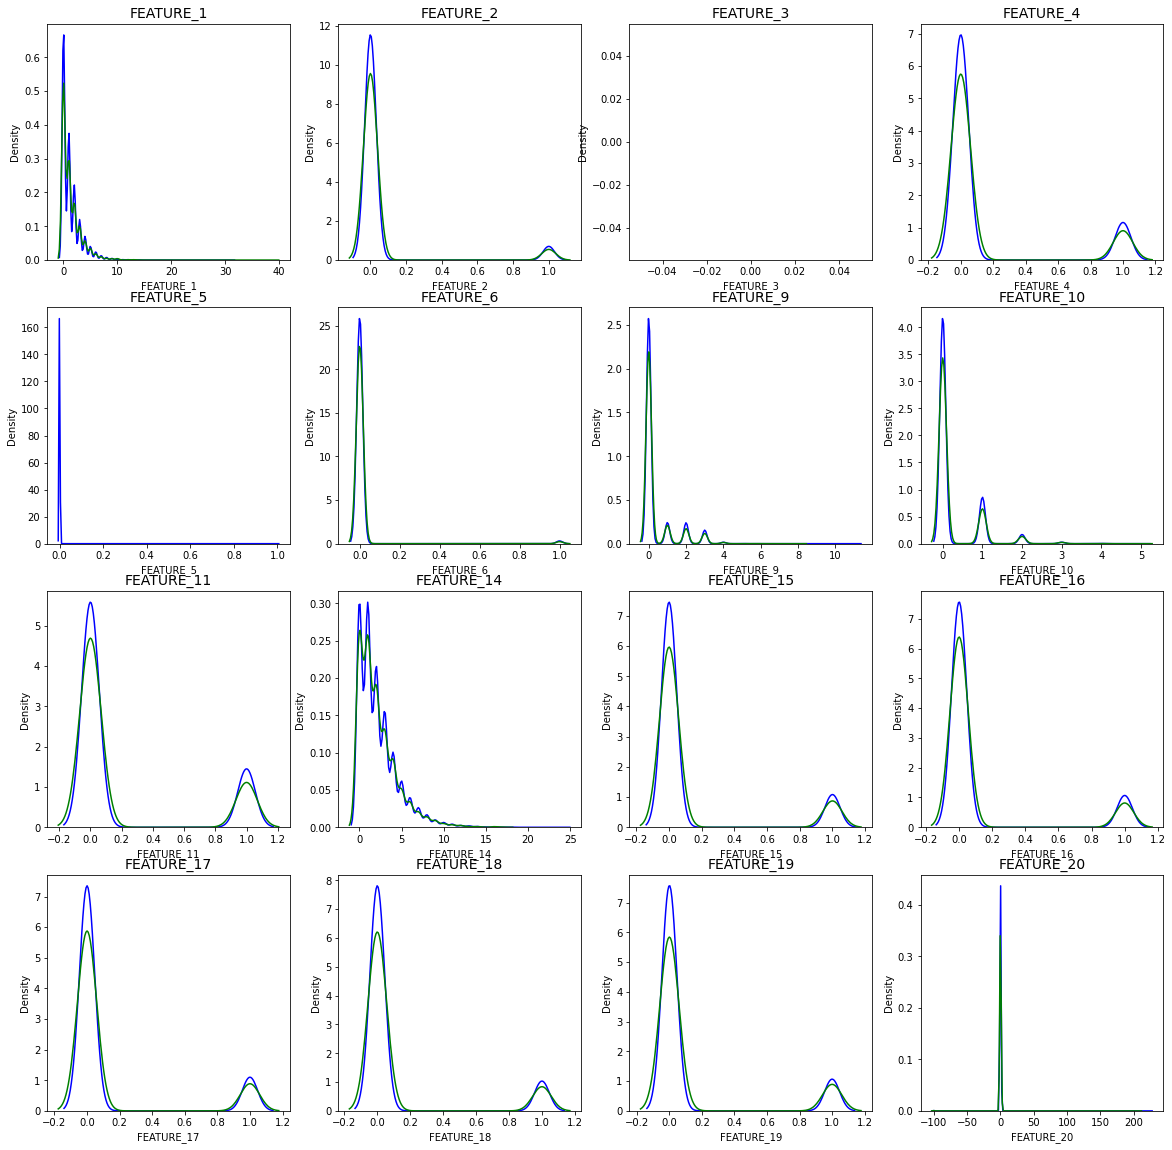

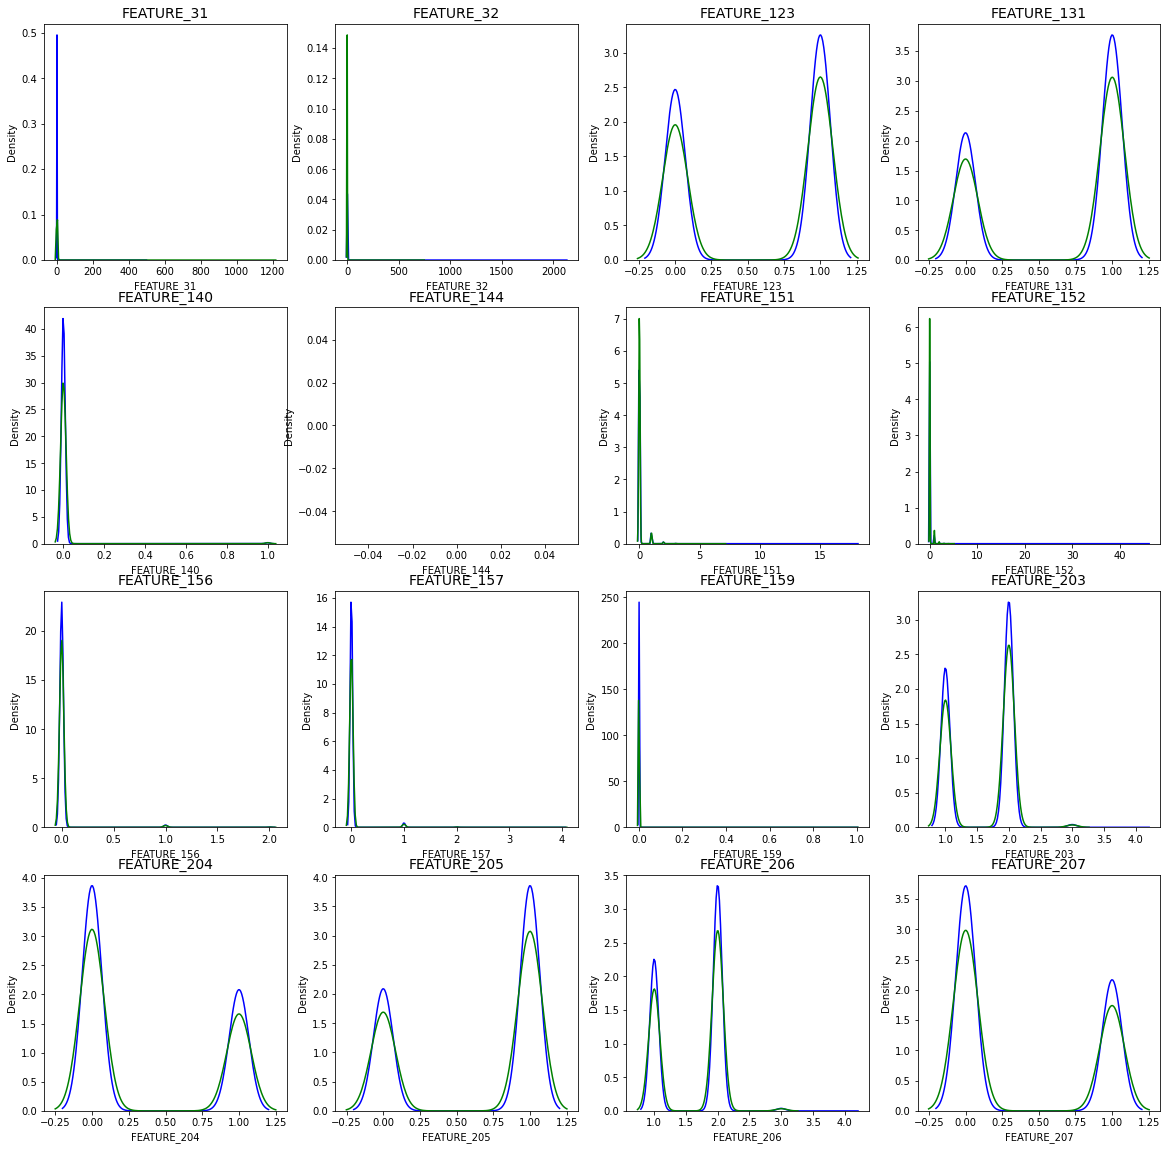

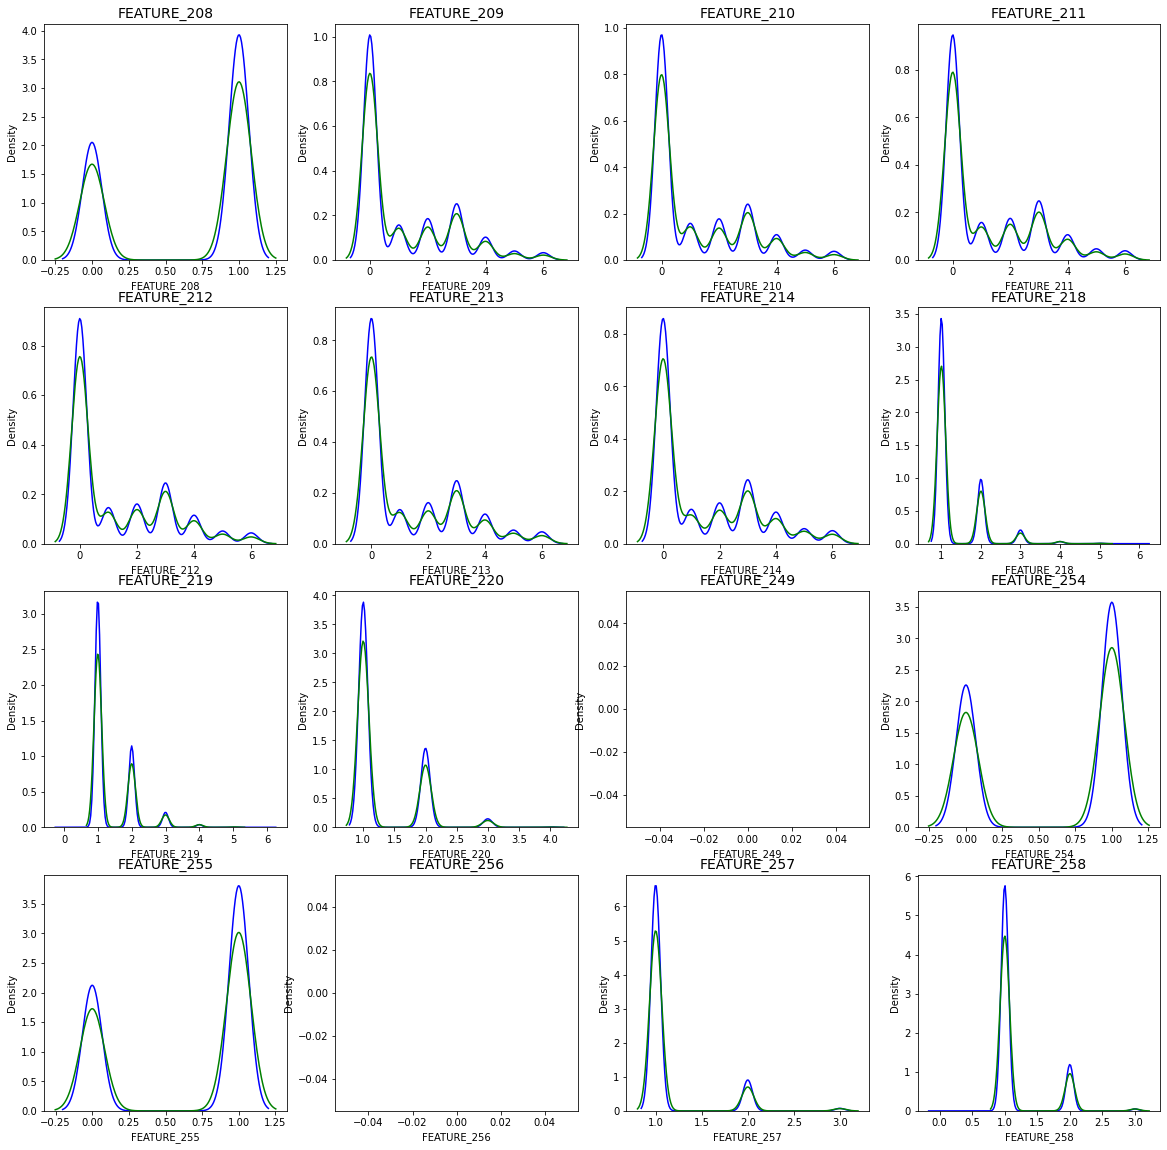

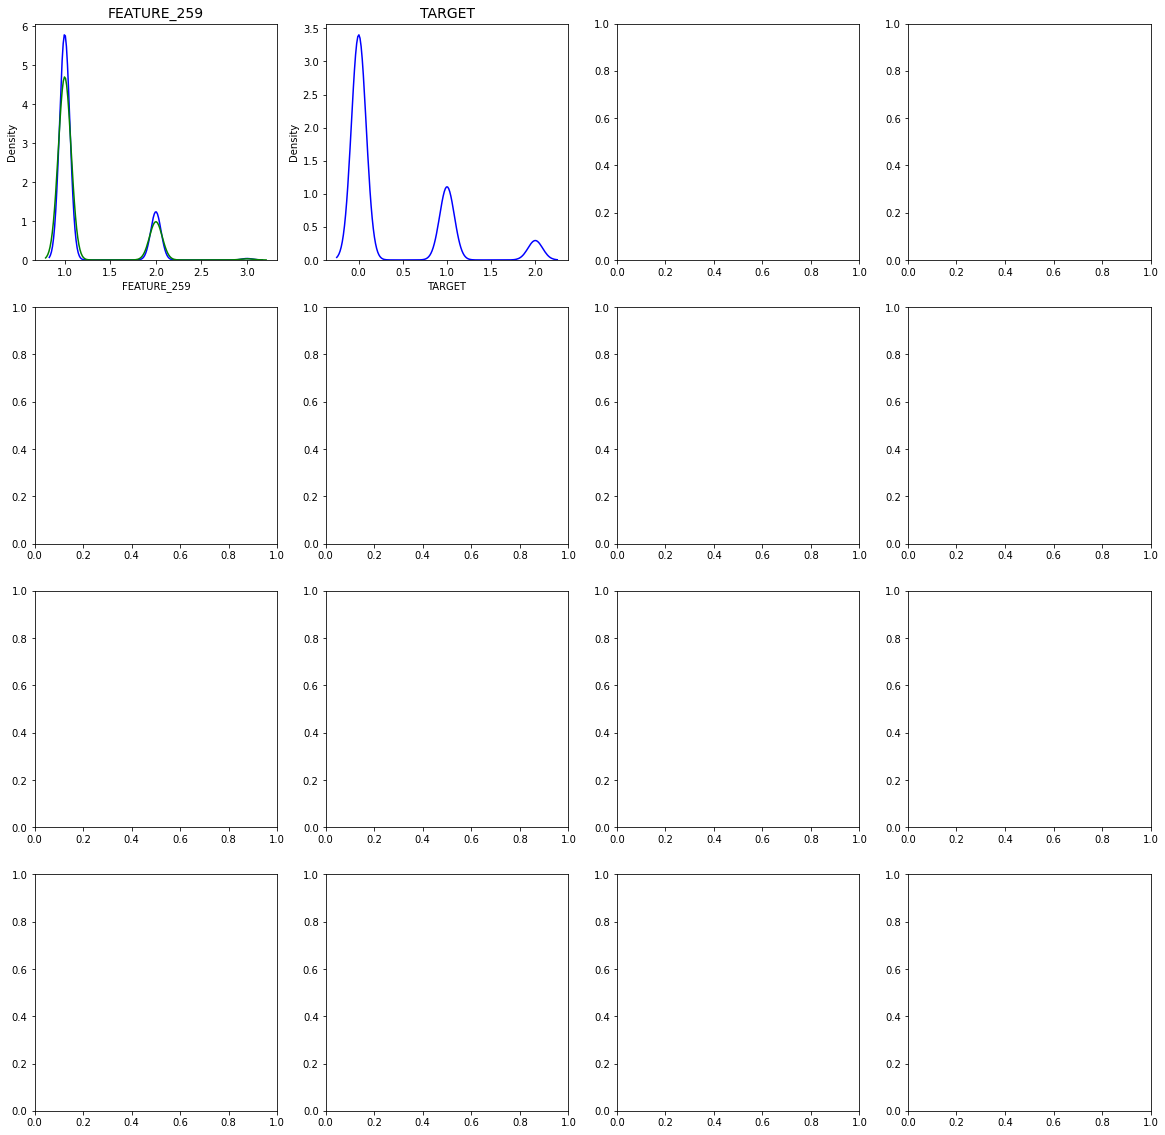

In [222]:
# Визуализация трейна и теста в kdeplot. Одновременно два графика (трейн-тест) в одной области. 
for i in range(4):
    fig, axes = plt.subplots(4, 4, figsize=(20, 20))

    for num, feature in enumerate(train_descr.iloc[:, i*16:(i+1)*16]):
        try:
            train_data, test_data = train[feature].copy(), test[feature].copy()
            sns.kdeplot(train_data, ax=axes[num//4, num%4], color="blue", label="train")
            sns.kdeplot(test_data, ax=axes[num//4, num%4], color="green", label="test")
        except RuntimeError:
            pass
        except KeyError:
            train_data = train[feature].copy()
            sns.kdeplot(train_data, ax=axes[num//4, num%4], color="blue", label="train")
        axes[num//4, num%4].set_title(feature, fontsize=14)

In [17]:
train['FEATURE_3'].value_counts()

0.0    18390
Name: FEATURE_3, dtype: int64

In [18]:
# Гипотеза: есть повторяющиеся "нулевые" столбцы. Давайте проверим 

In [19]:
feature_0 = []

for feat in numerical_features: 
    if (len(train[feat].unique()) == 1) and (len(test[feat].unique()) == 1) and (train[feat].unique() == 0): 
        feature_0.append(feat)

In [20]:
feature_0

['FEATURE_3', 'FEATURE_144', 'FEATURE_249', 'FEATURE_256']

`Вывод:` эти 4 столбца можно слить в один. Оставить только `FEATURE_3`

In [21]:
threshold = train.shape[0]*0.9

In [22]:
threshold

16551.0

In [23]:
# Также отберем и впоследствии удалим те бинарные фичи (0-1), в которых отношение нулевых признаков к единичным более 90%

In [25]:
feature_90 = []

In [26]:
for feat in discrete_feature:
    try:
        if train_descr[feat].value_counts()[0] > threshold: 
            feature_90.append(feat) 
    except KeyError as ke: 
        continue

In [27]:
feature_90 = list(set(feature_90))

In [28]:
feature_90 

['FEATURE_2',
 'FEATURE_31',
 'FEATURE_256',
 'FEATURE_249',
 'FEATURE_32',
 'FEATURE_156',
 'FEATURE_5',
 'FEATURE_140',
 'FEATURE_20',
 'FEATURE_157',
 'FEATURE_6',
 'FEATURE_3',
 'FEATURE_159',
 'FEATURE_144']

In [29]:
# Похожесть признаков 209-214. Их нужно слить в один признак

In [30]:
similar_feature = ["FEATURE_209", "FEATURE_210", "FEATURE_211", 
                "FEATURE_212", "FEATURE_213", "FEATURE_214"]
#or to delete?
# какой-то один признак нужно обязательно оставить. Например "Feature_209"

In [31]:
#удаляем дублирующиеся фичи
# список feature_90, feature_0 - но только в конце

In [32]:
# Анализ пропусков
# Как мы видим, группировка нам ничего не дала. Надо попробовать что-то другое. 

<AxesSubplot:>

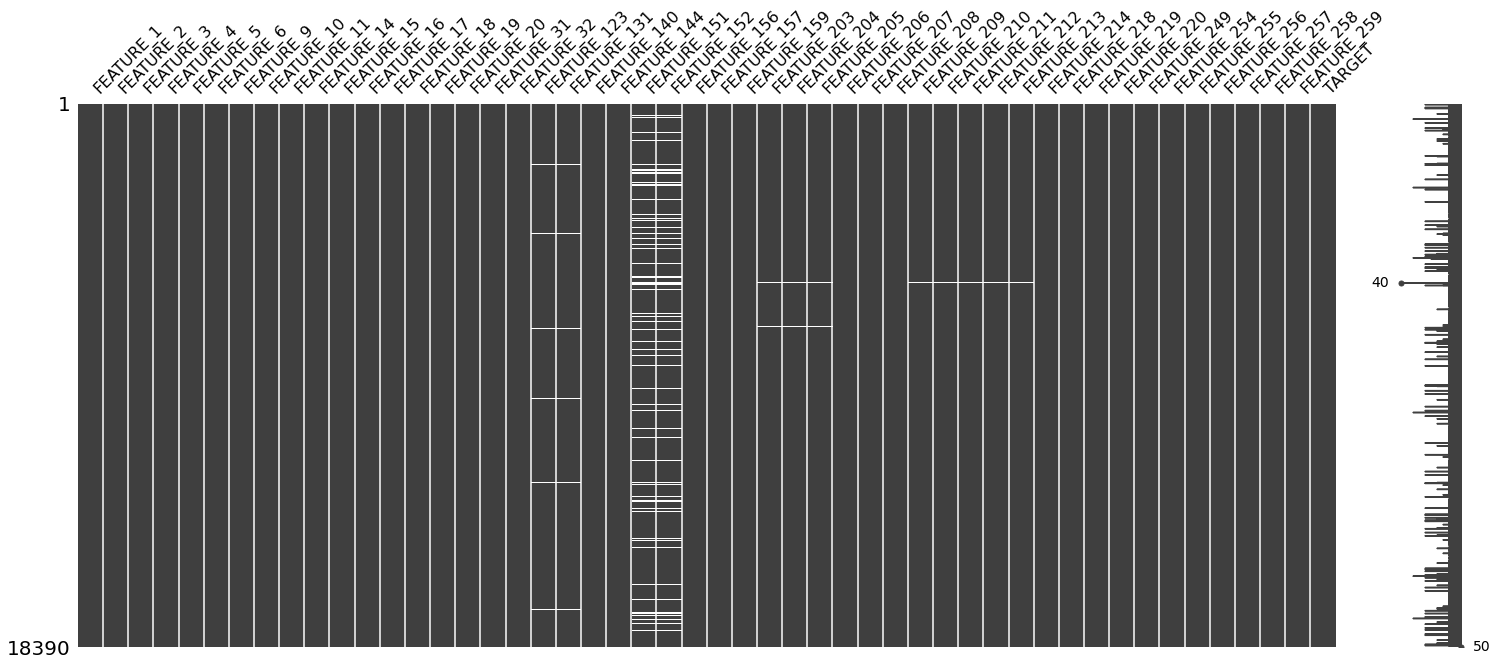

In [33]:
msno.matrix(train[discrete_feature])

In [34]:
df_discrete_train = train[discrete_feature]

In [35]:
features_with_na = [
    feature for feature in df_discrete_train.columns
    if df_discrete_train[feature].isnull().sum() > 1]

In [38]:
# Кол-во дискретных фичей с пропусками
len(features_with_na)

14

In [39]:
missing_values = df_discrete_train[features_with_na].isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

In [40]:
#наибольшее кол-во пропусков в фичах
missing_values.tail(10)

column_name  missing_count
7  FEATURE_206             91
4  FEATURE_203             94
9  FEATURE_208             95
8  FEATURE_207             97
6  FEATURE_205             98
5  FEATURE_204            100
0  FEATURE_123            218
1  FEATURE_131            218
2  FEATURE_151           1824
3  FEATURE_152           1824

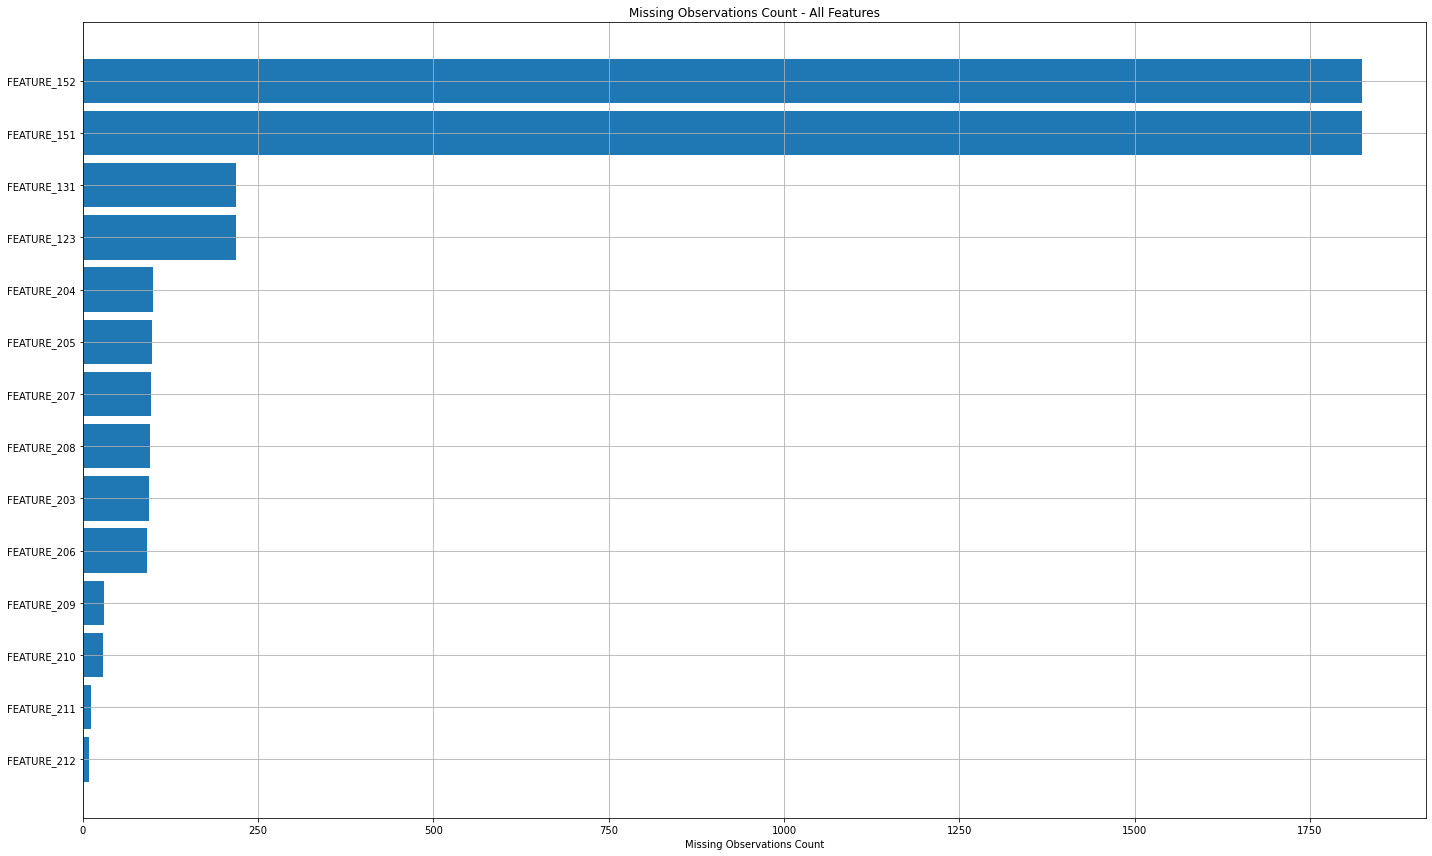

In [41]:
ind = np.arange(missing_values.shape[0])
fig, axes = plt.subplots(figsize=(20, 12))
rects = axes.barh(ind, missing_values.missing_count.values, height=0.85)
axes.set_yticks(ind)
axes.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
axes.set_title("Missing Observations Count - All Features")
axes.set_xlabel("Missing Observations Count")
plt.grid()
plt.tight_layout()

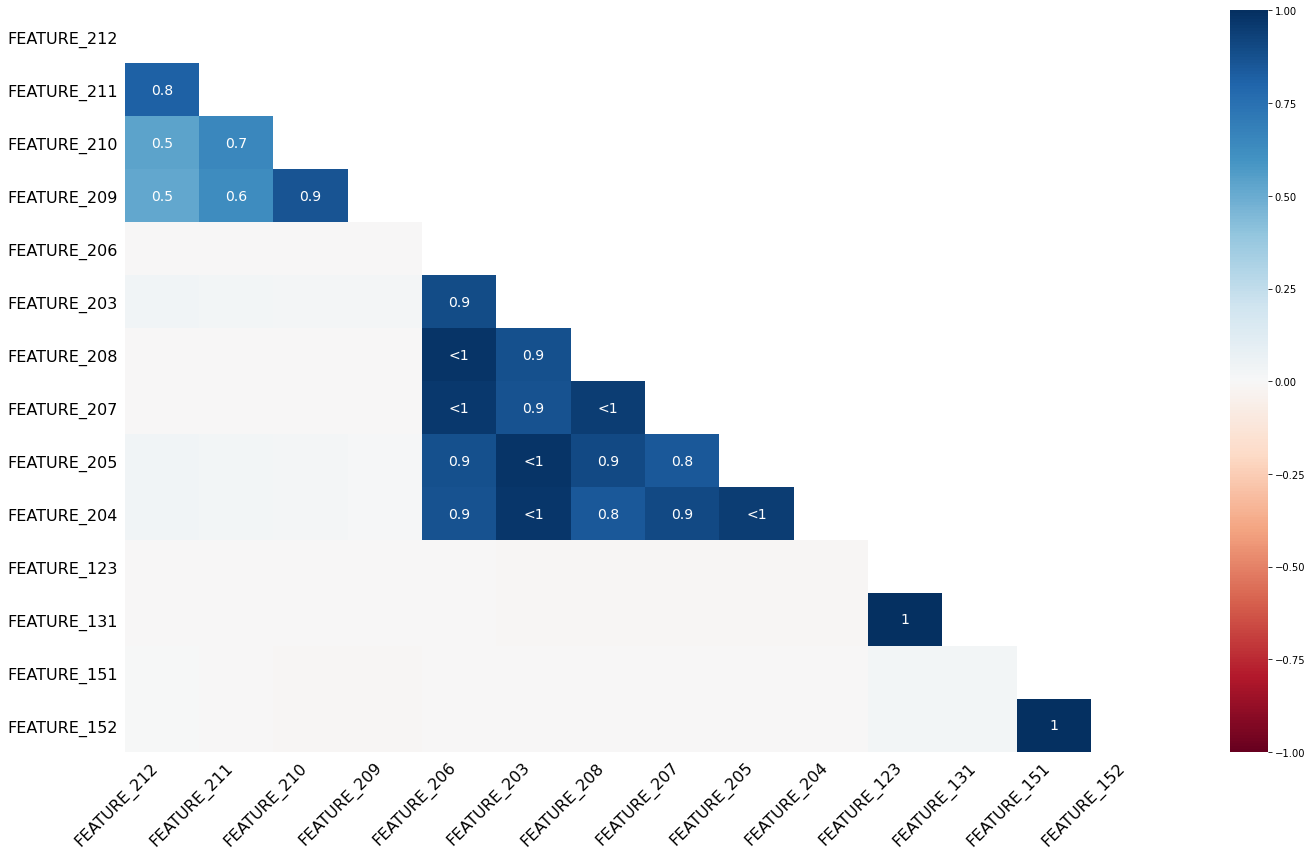

In [42]:
msno.heatmap(df_discrete_train[missing_values.column_name.to_list()])
plt.tight_layout()

In [34]:
# Поудаляли в одних и тех же местах что-ли? Вернуться к этой мысли и проверить. 

## Непрерывные признаки

In [43]:
continuous_feature = [
    feature for feature in numerical_features
    if feature not in discrete_feature + ["ID"]]

print(f"Continuous Feature Count {len(continuous_feature)}")

Continuous Feature Count 211


In [44]:
train_con = train[continuous_feature]

Для непрерывные признаков имеет смысл строить гистрограммы распределения или функции распределения, а также зависимость непрерывного признака в разрезе целевой переменной. Кроме того, имеет смысл строить распределение __одновременно__ и для обучающей выборки, и для тестовой для понимания насколько отличаются распределения.

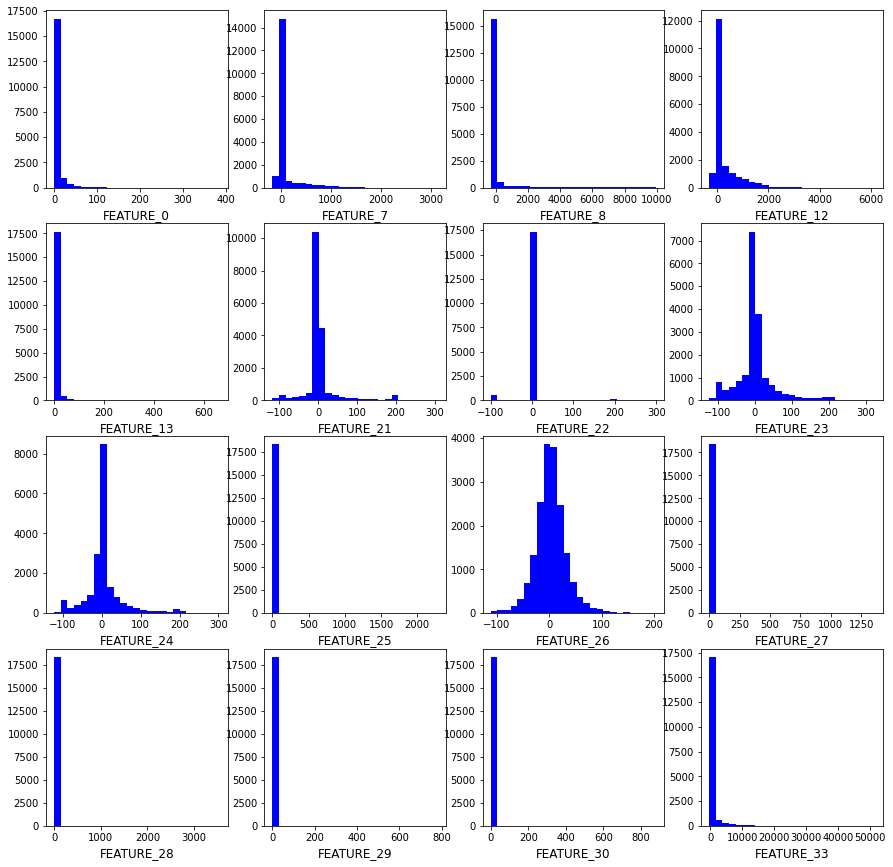

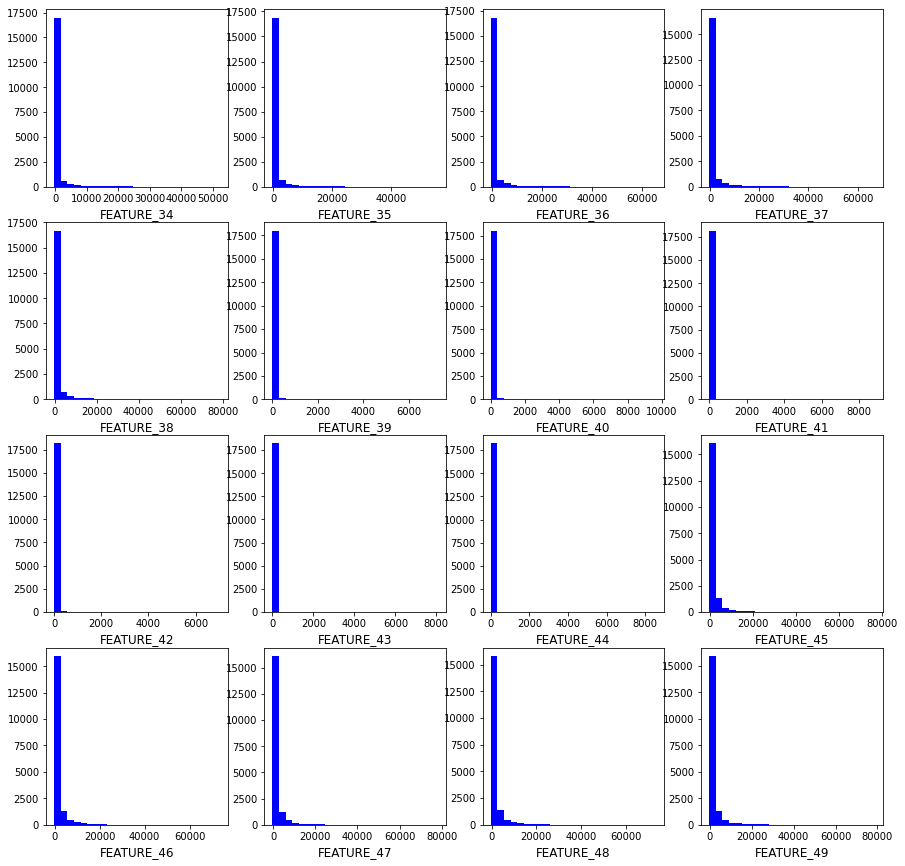

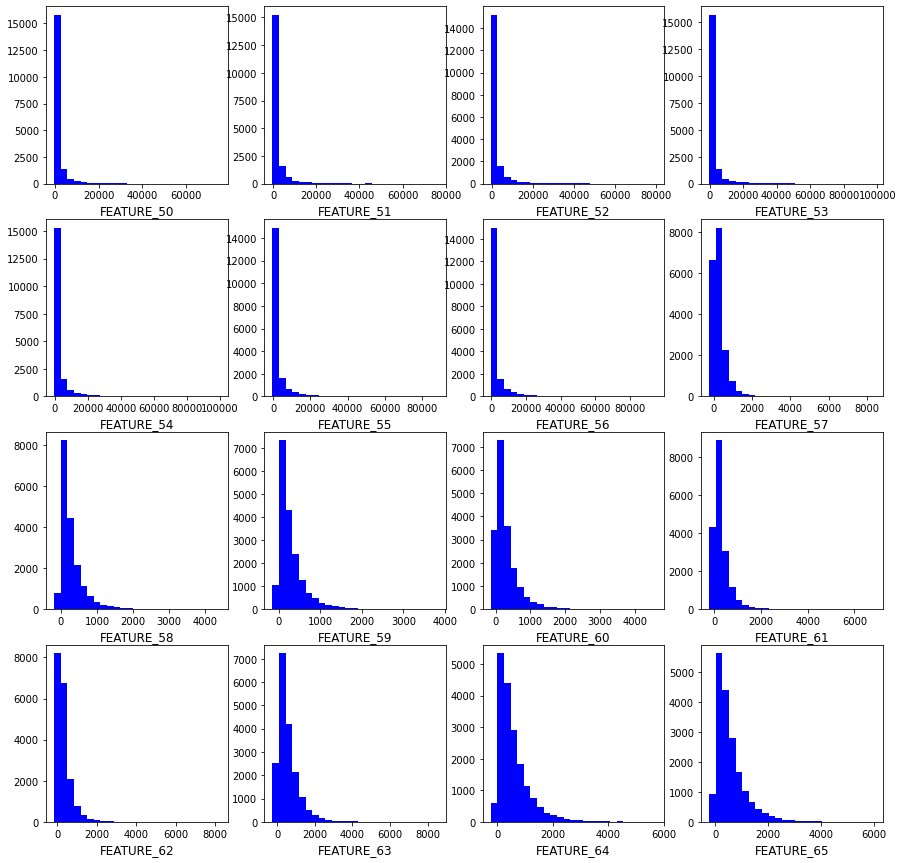

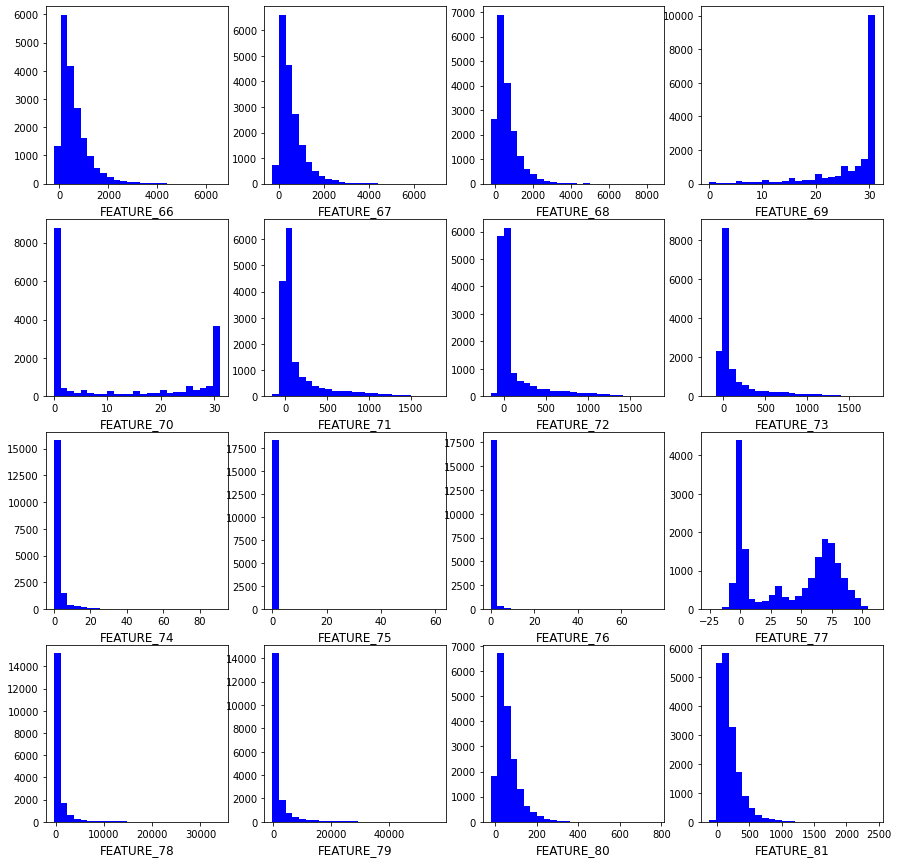

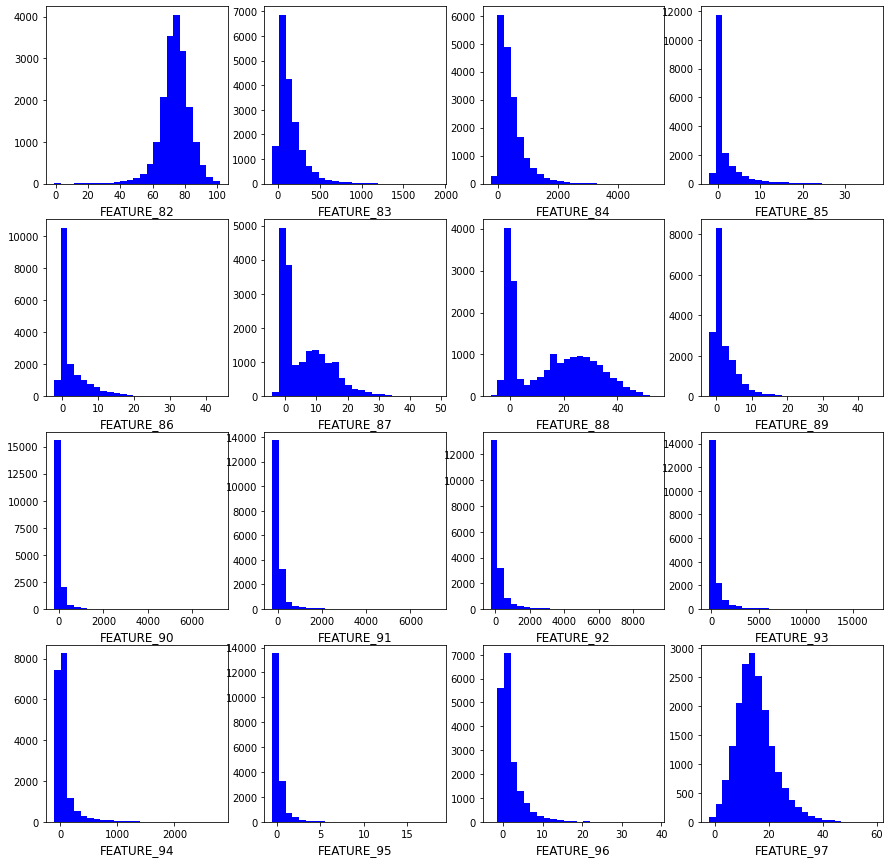

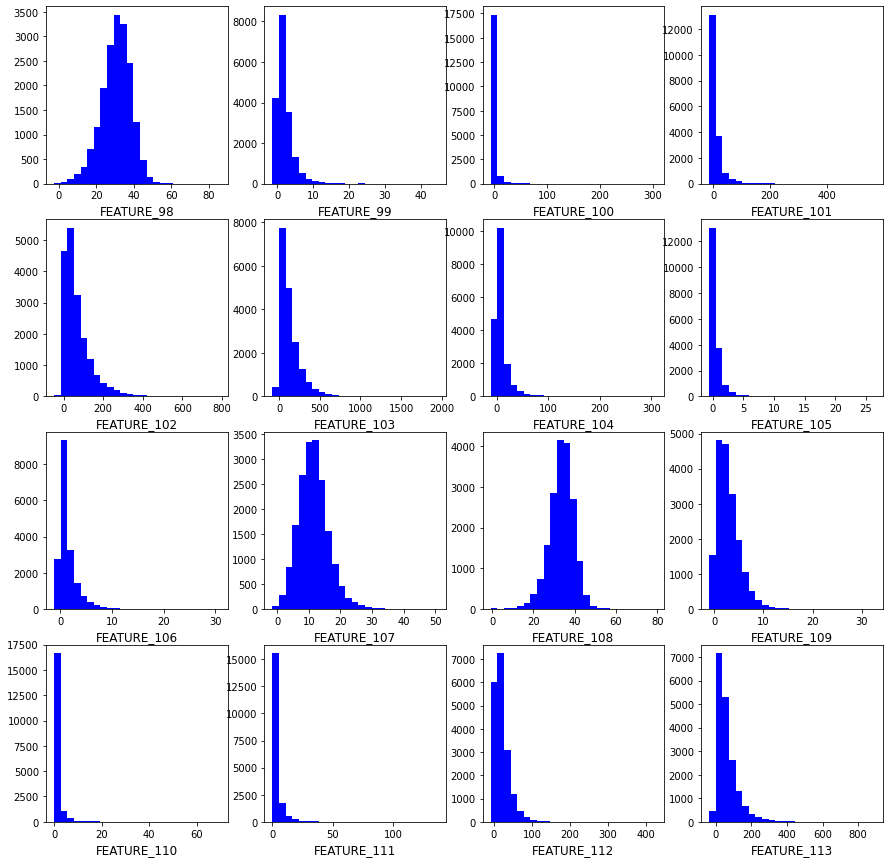

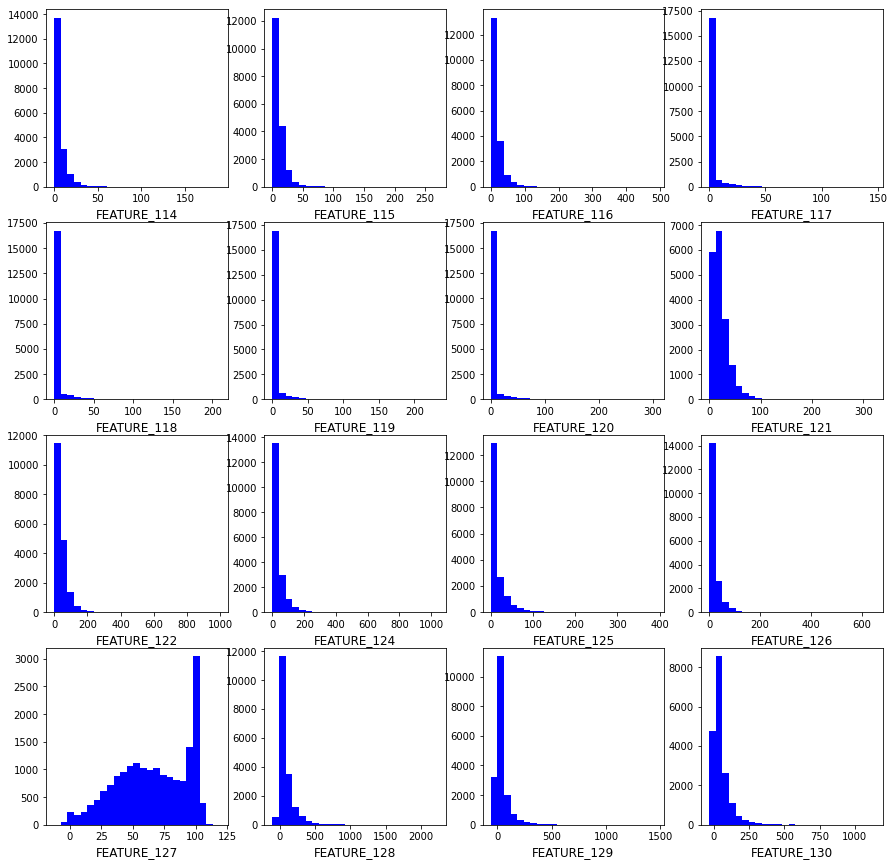

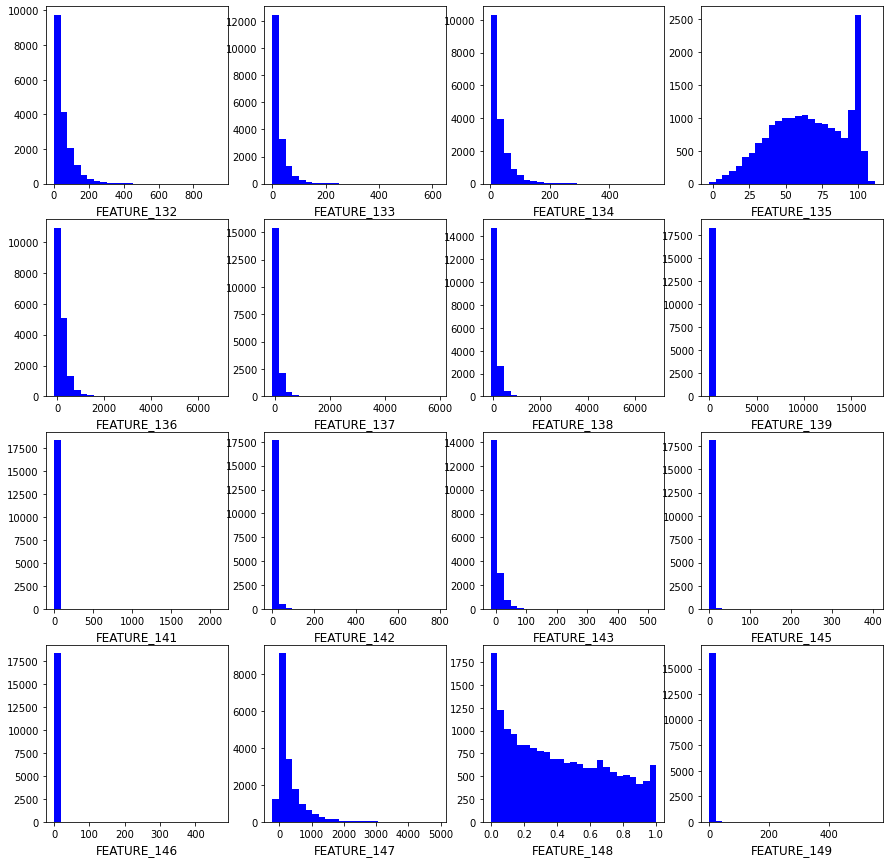

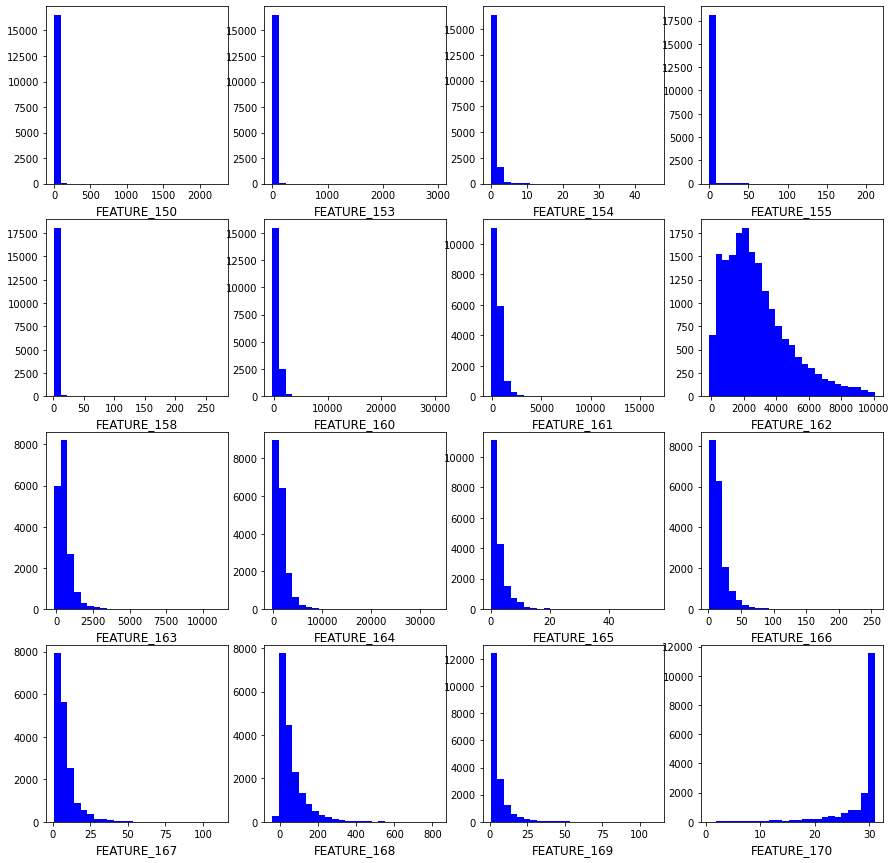

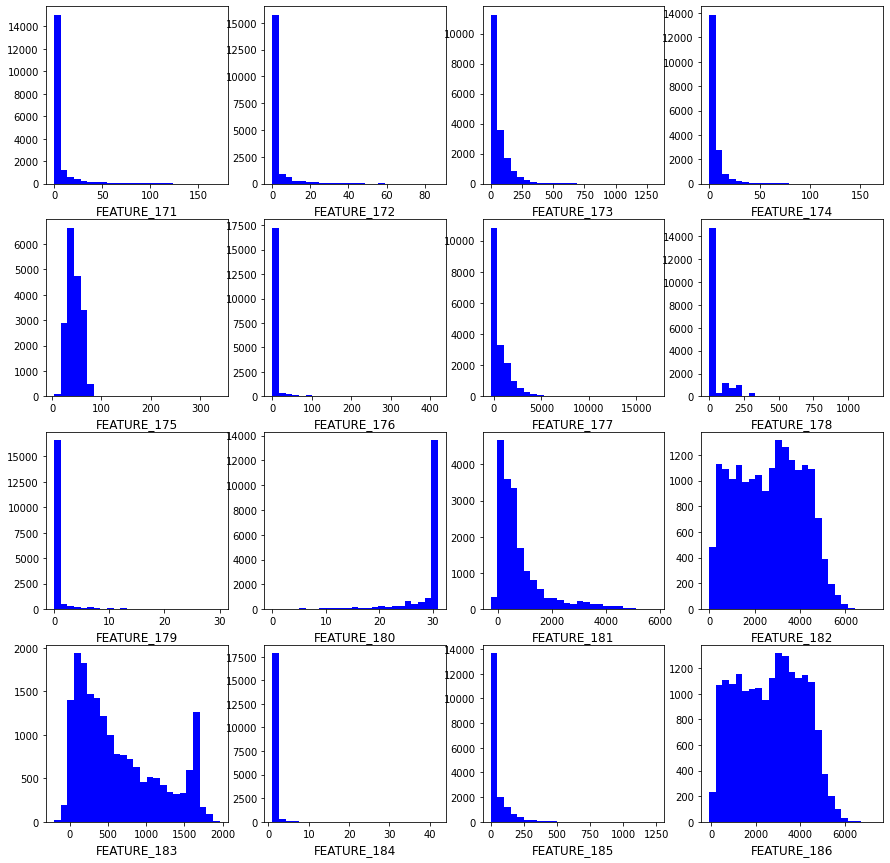

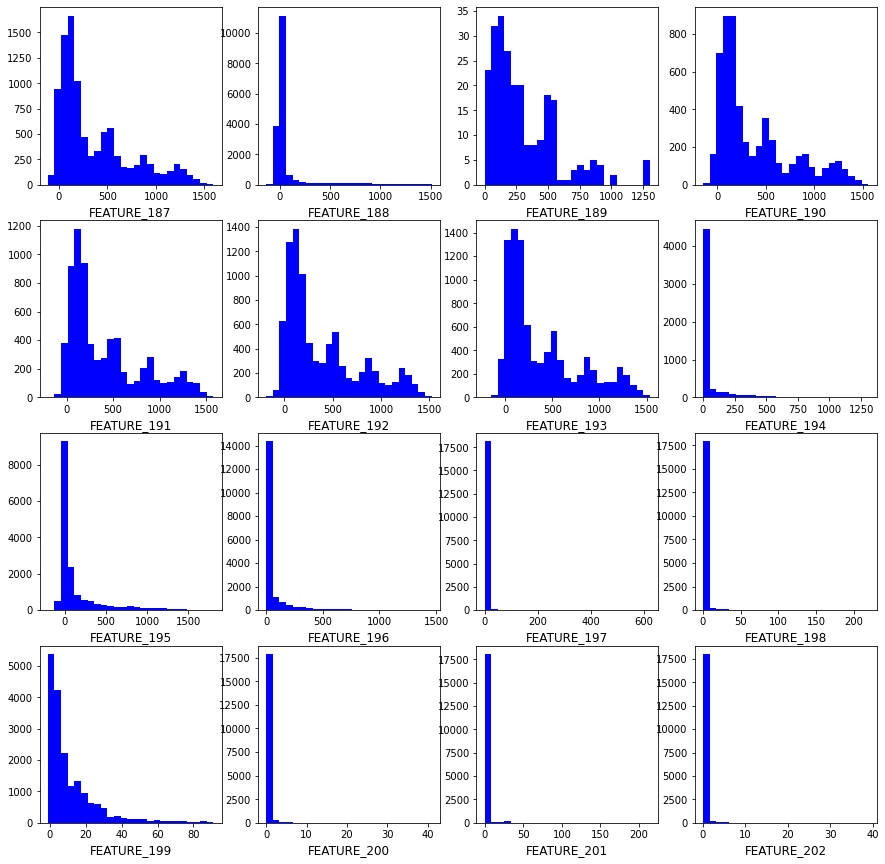

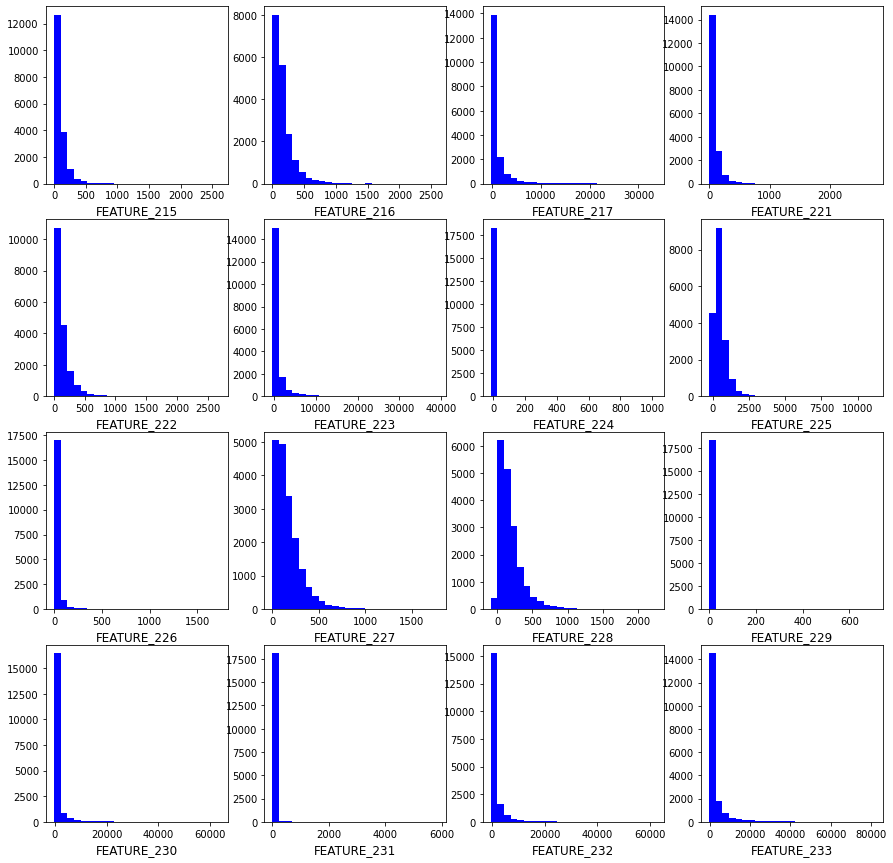

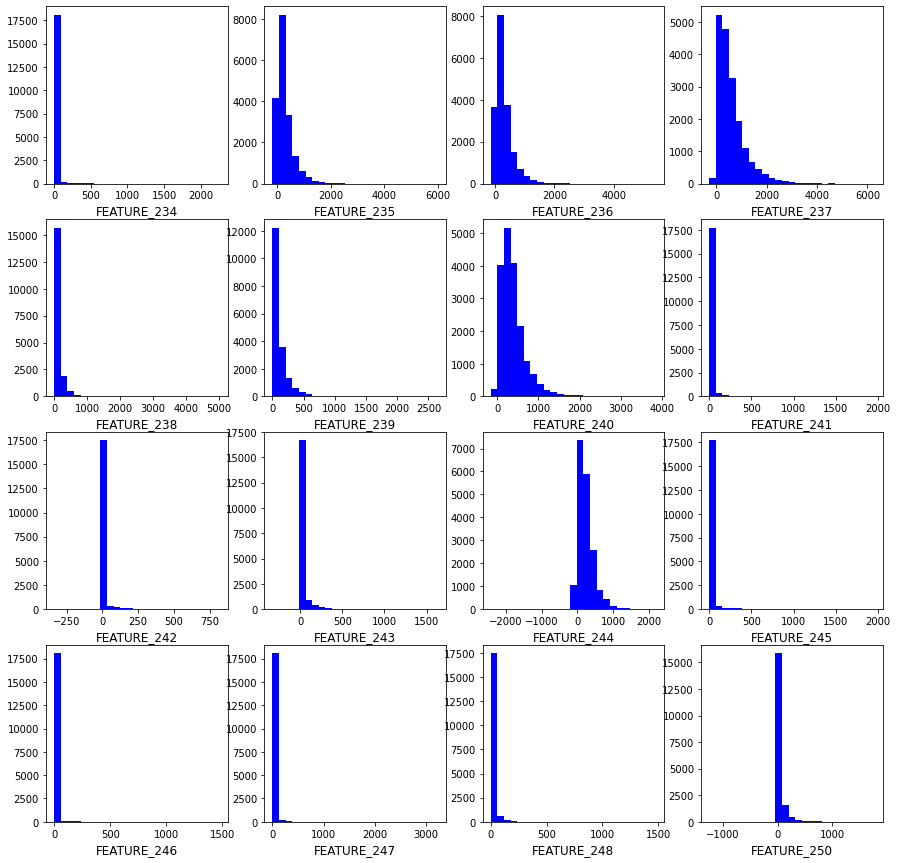

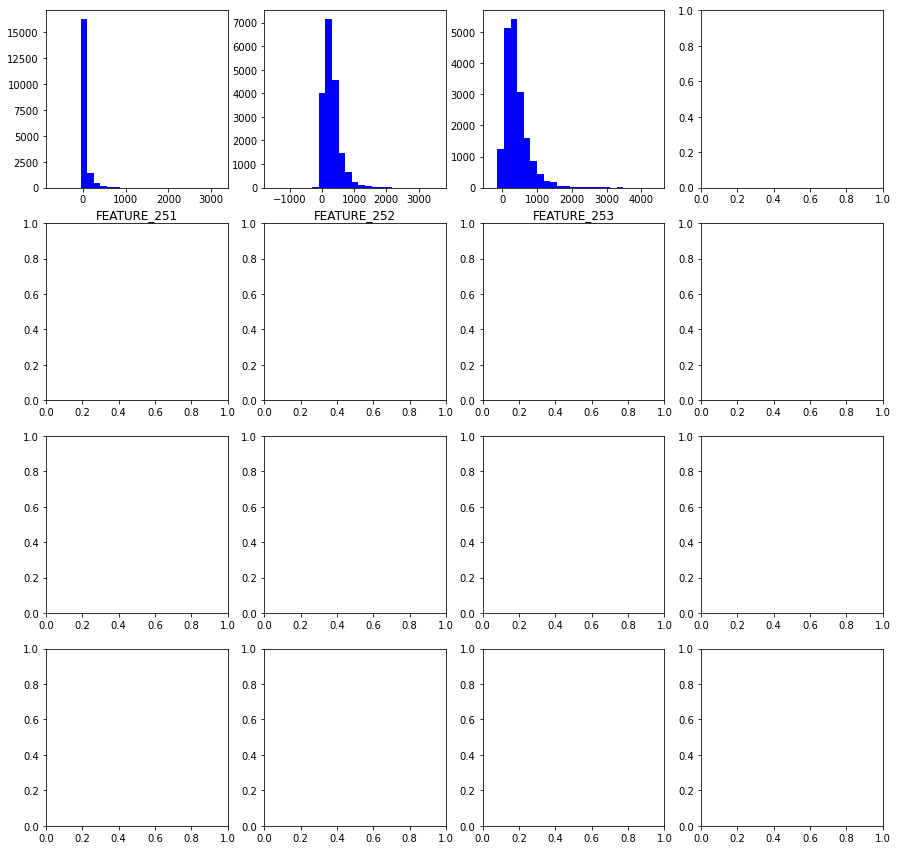

In [45]:
for i in range(14):
    fig, axes = plt.subplots(4, 4, figsize=(15, 15))

    for num, feature in enumerate(train_con.iloc[:, i*16:(i+1)*16]):
        data = train[feature].copy()
        axes[num//4, num%4].hist(data, bins=25, color="blue")
        axes[num//4, num%4].set_xlabel(feature, fontsize=12)

In [49]:
for feat in continuous_feature:
    try:
        if train_con[feat].value_counts()[0] > threshold: 
            feature_90.append(feat) 
    except KeyError as ke: 
        continue

In [50]:
# фичи - кандидаты на удаление из датасета. Посмотреть еще раз выборочно распределение и убедиться, что гипотеза действительно работает
feature_90

['FEATURE_2',
 'FEATURE_31',
 'FEATURE_256',
 'FEATURE_249',
 'FEATURE_32',
 'FEATURE_156',
 'FEATURE_5',
 'FEATURE_140',
 'FEATURE_20',
 'FEATURE_157',
 'FEATURE_6',
 'FEATURE_3',
 'FEATURE_159',
 'FEATURE_144',
 'FEATURE_22',
 'FEATURE_25',
 'FEATURE_27',
 'FEATURE_28',
 'FEATURE_29',
 'FEATURE_30',
 'FEATURE_39',
 'FEATURE_40',
 'FEATURE_41',
 'FEATURE_42',
 'FEATURE_43',
 'FEATURE_44',
 'FEATURE_75',
 'FEATURE_139',
 'FEATURE_141',
 'FEATURE_145',
 'FEATURE_146',
 'FEATURE_176',
 'FEATURE_200',
 'FEATURE_201',
 'FEATURE_202',
 'FEATURE_229',
 'FEATURE_231',
 'FEATURE_246']

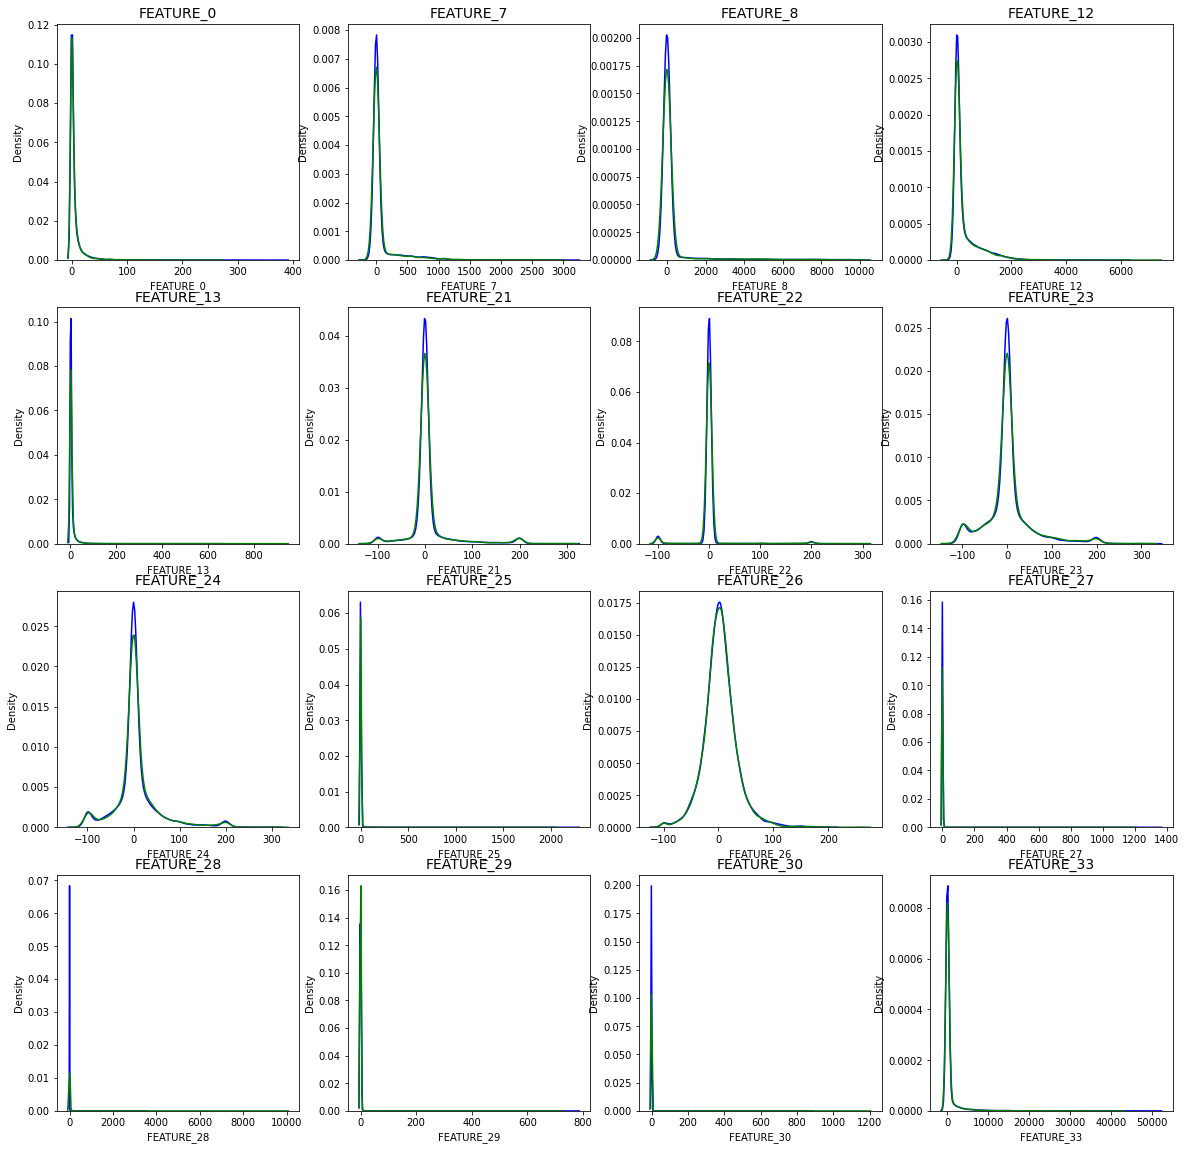

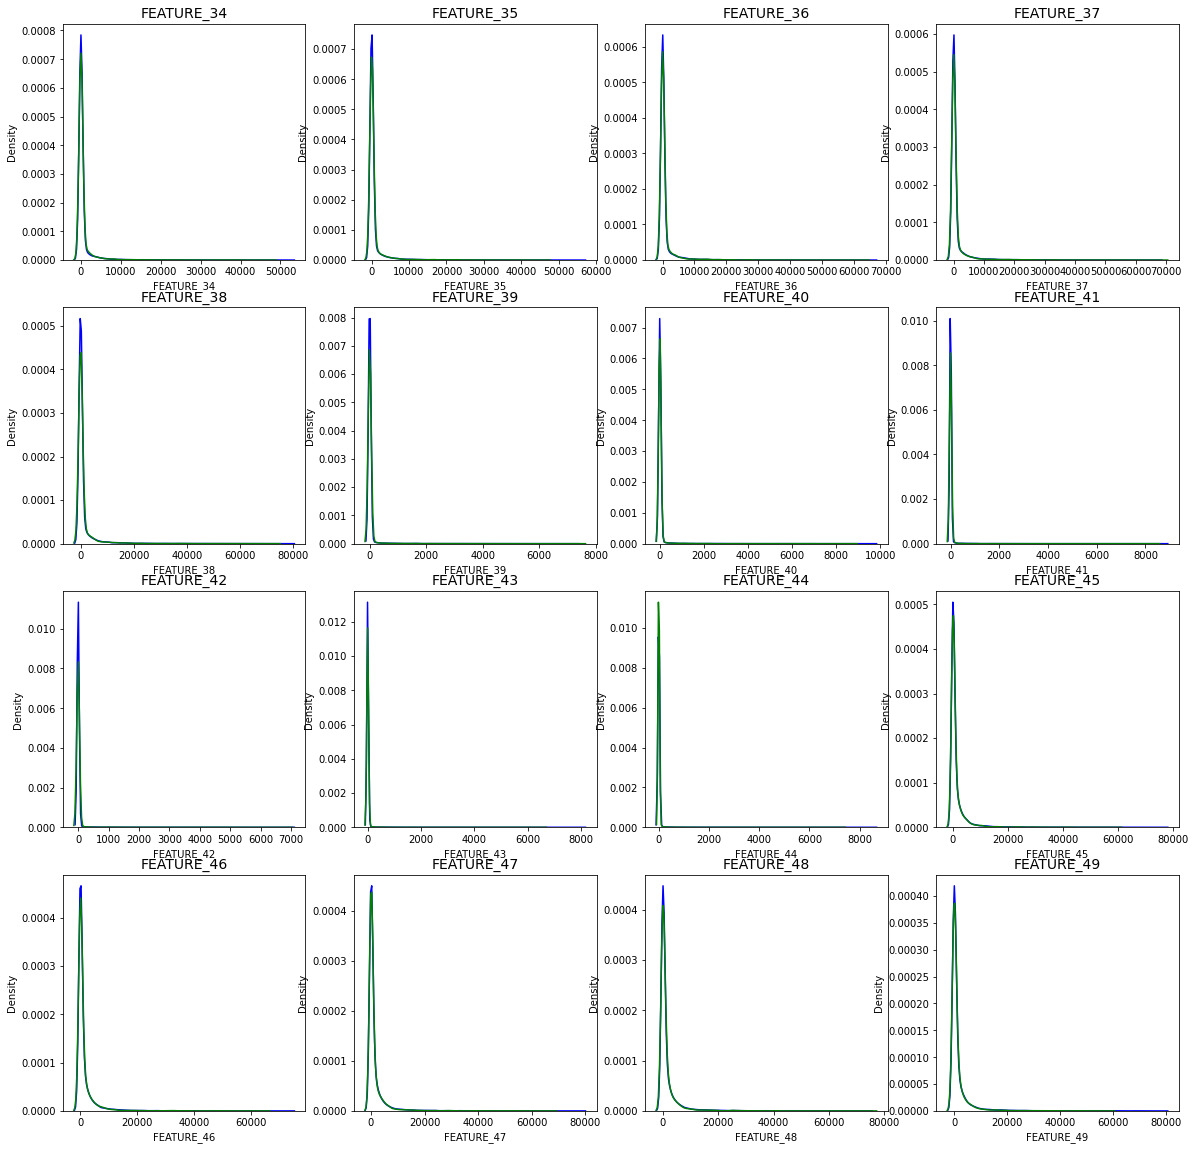

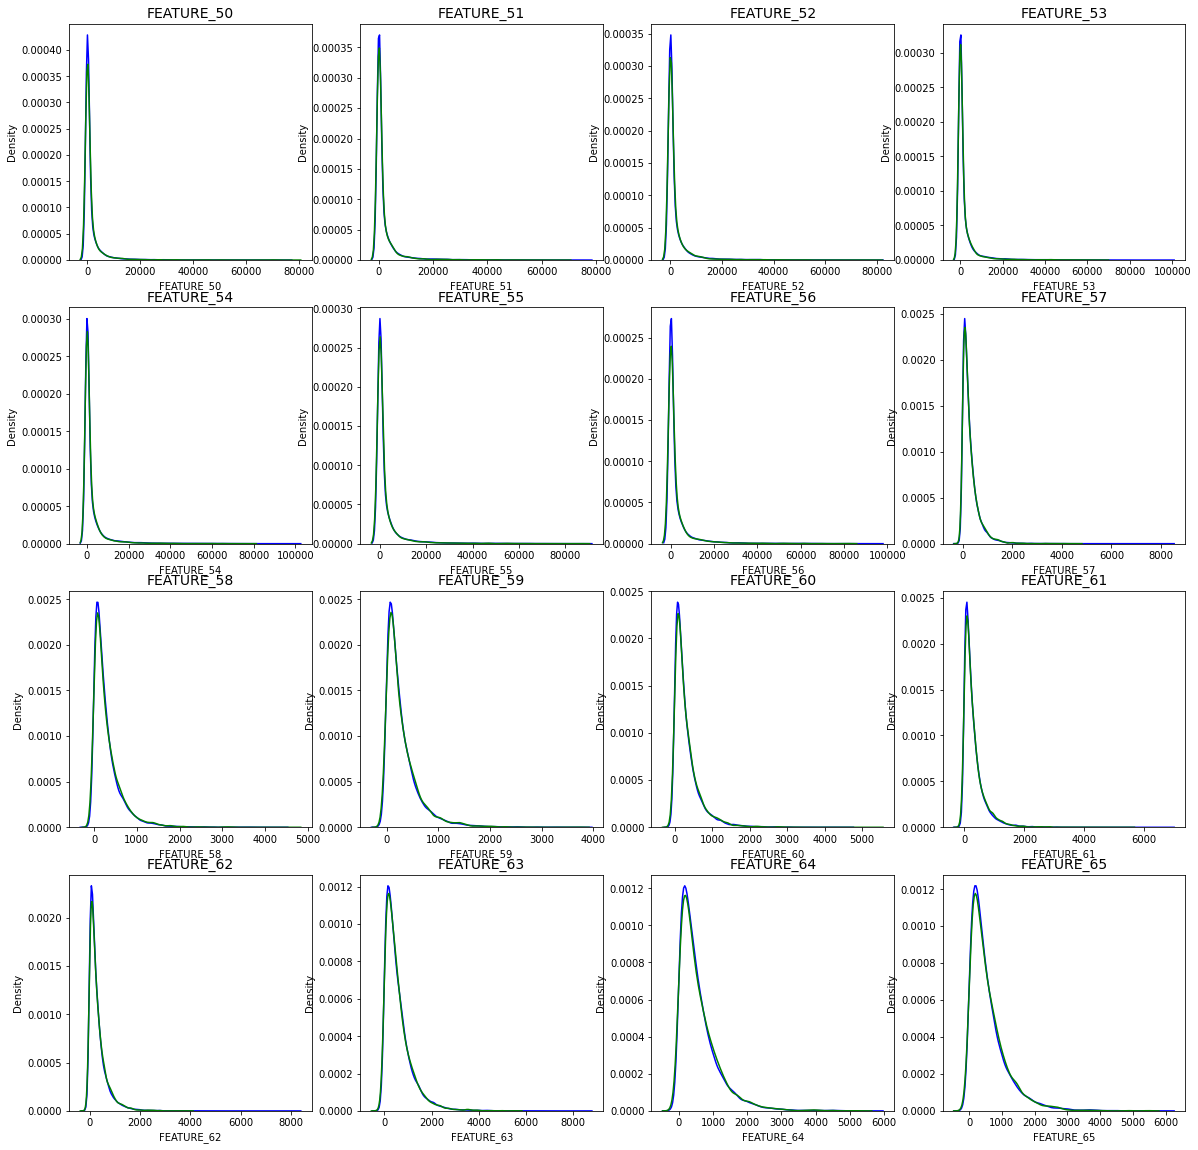

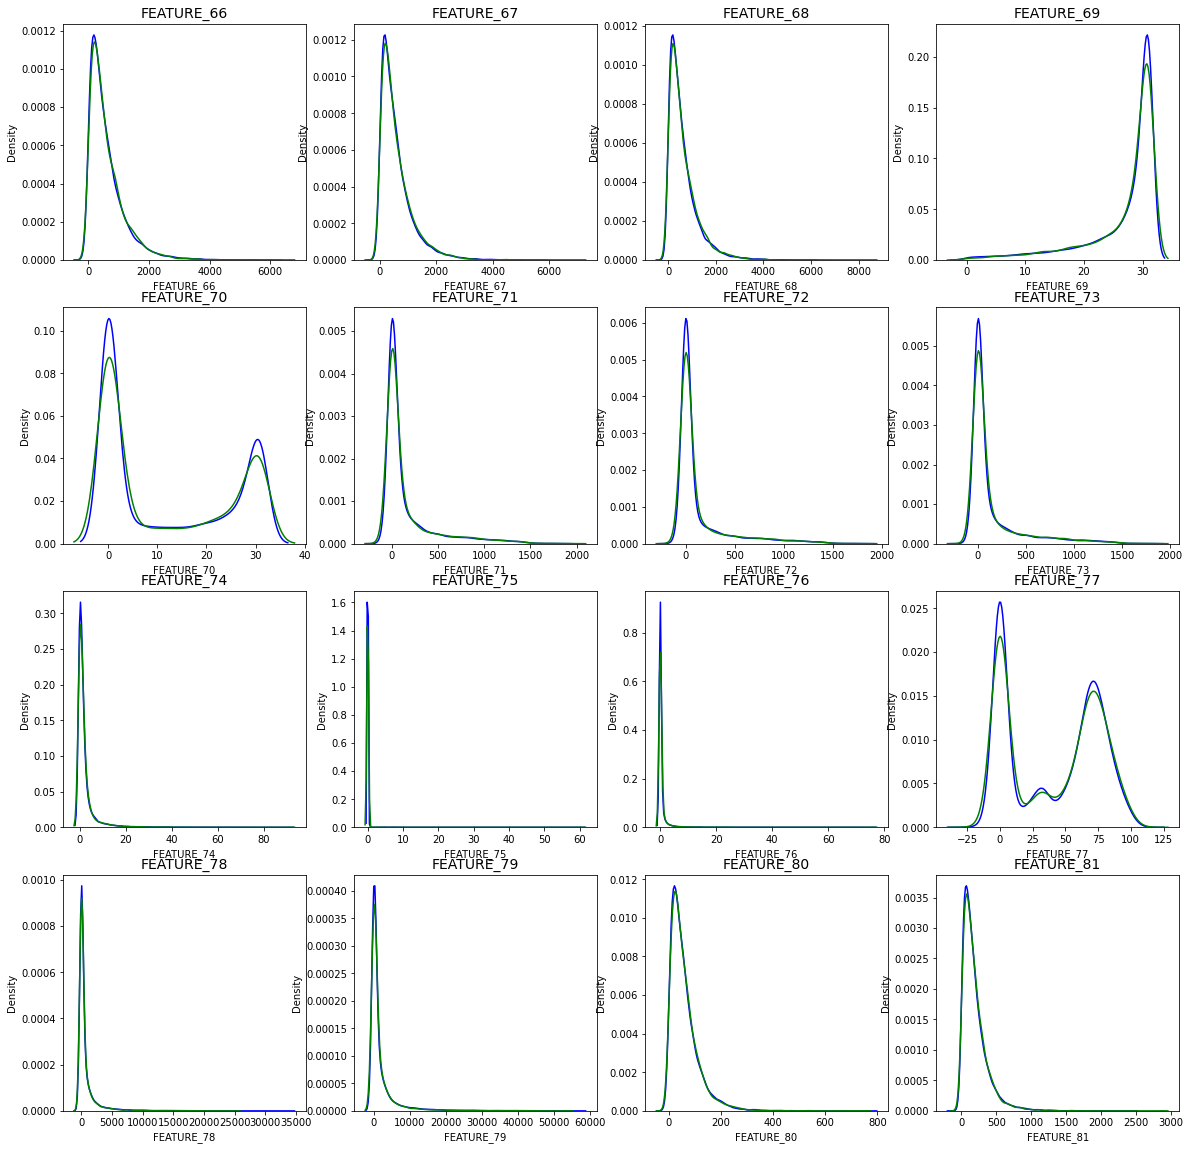

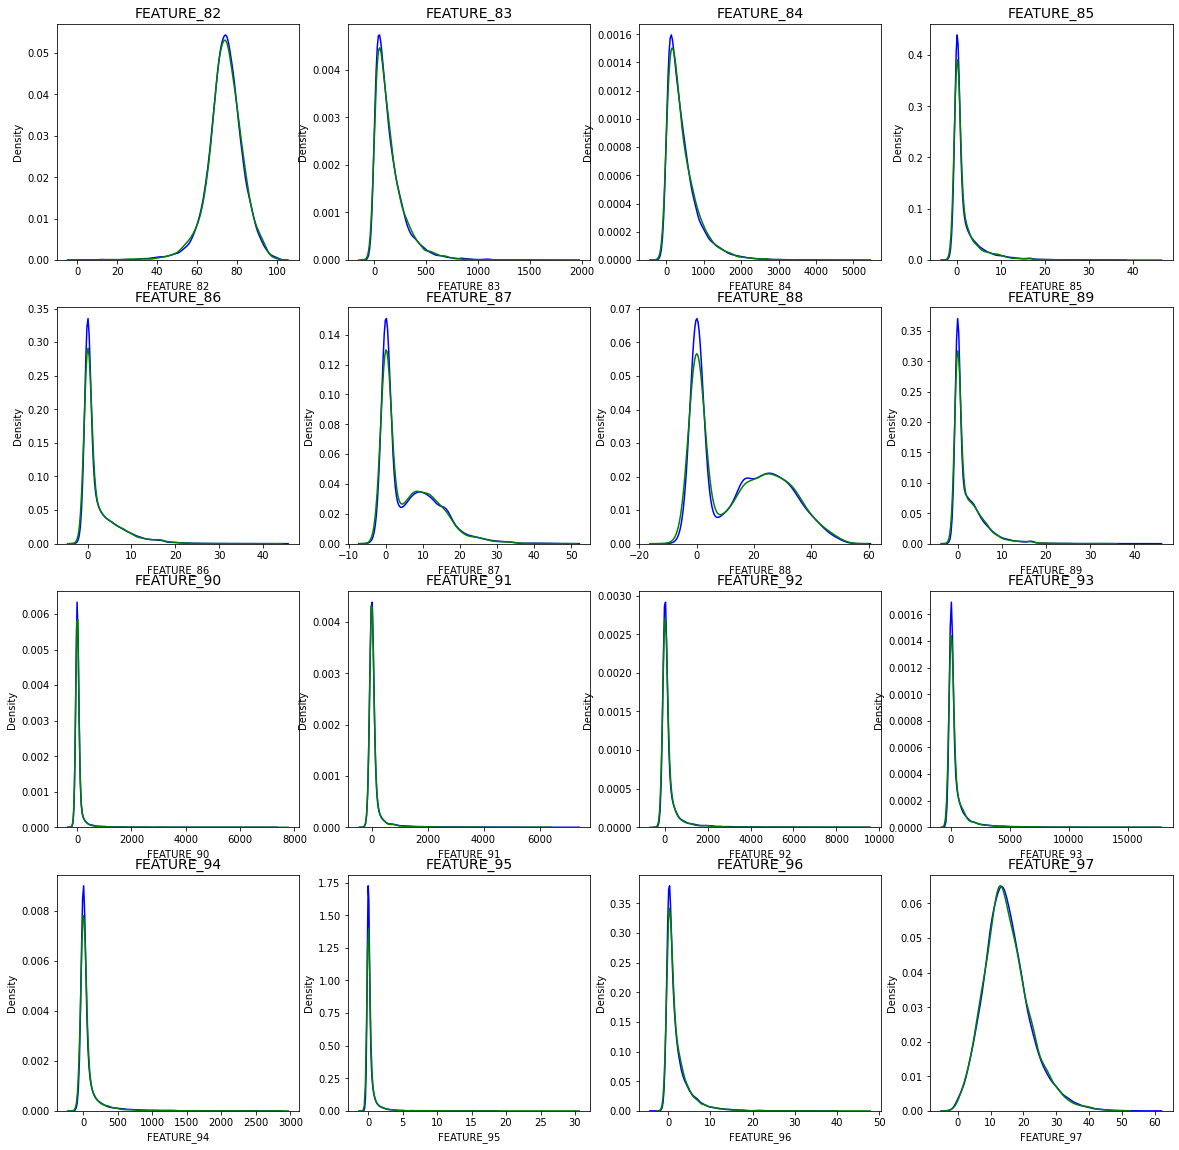

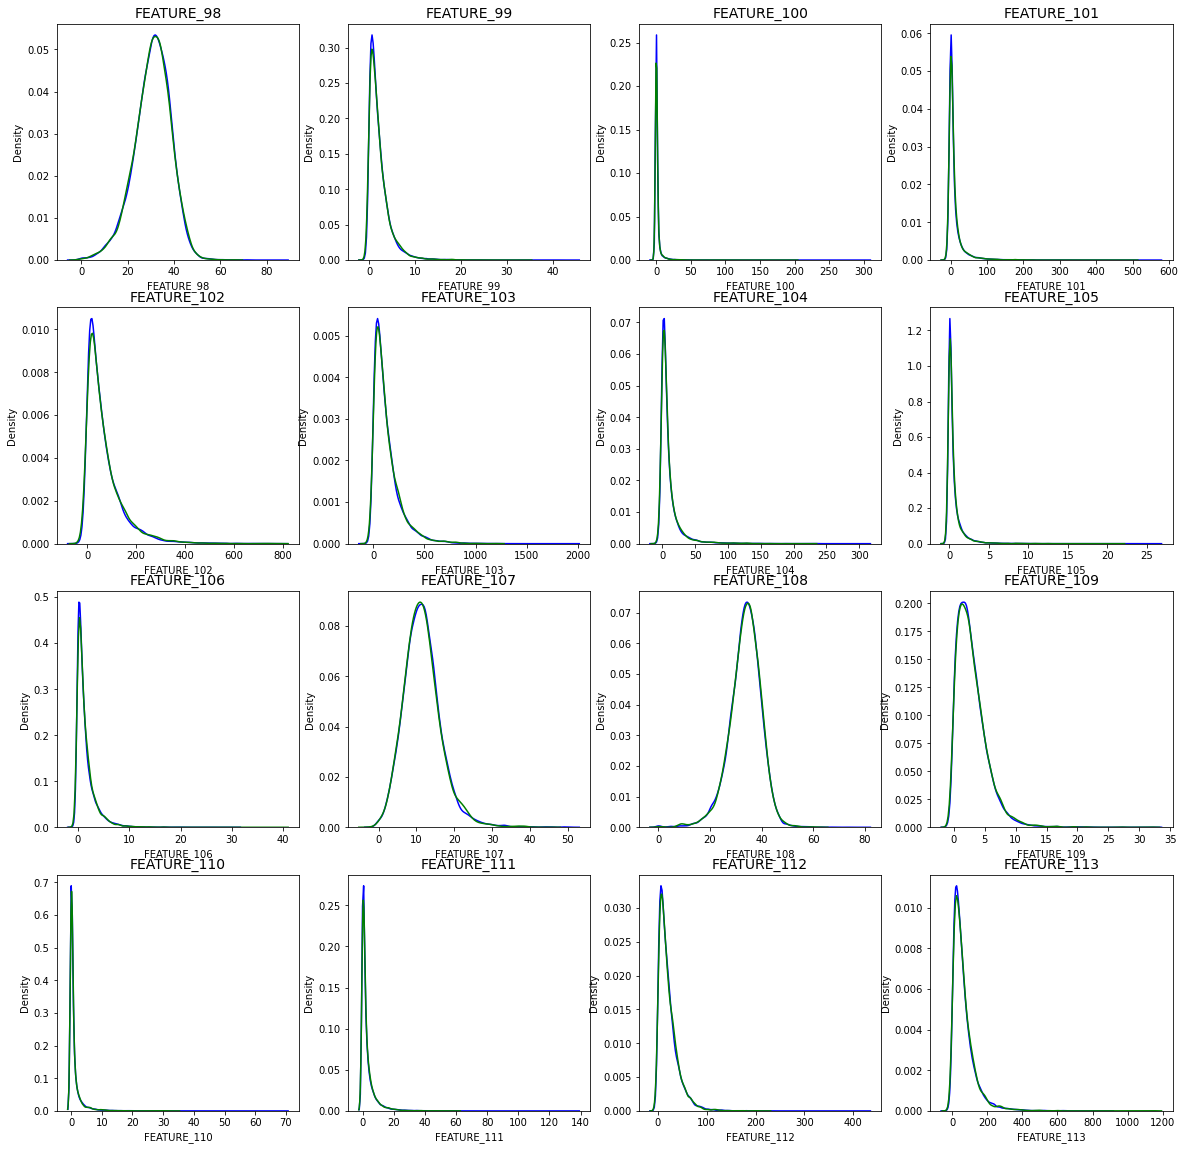

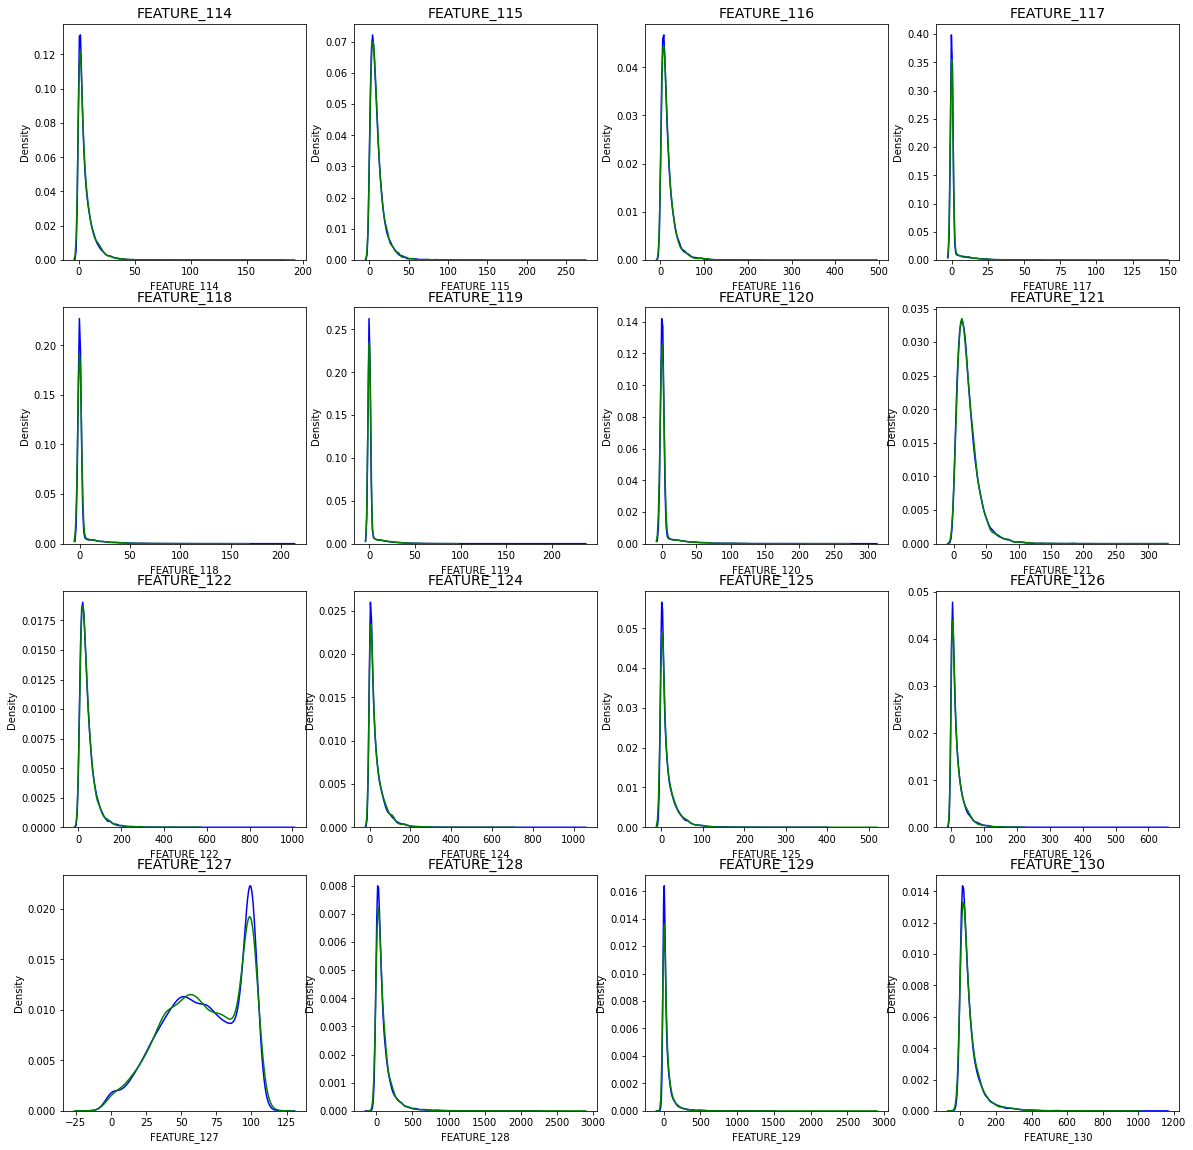

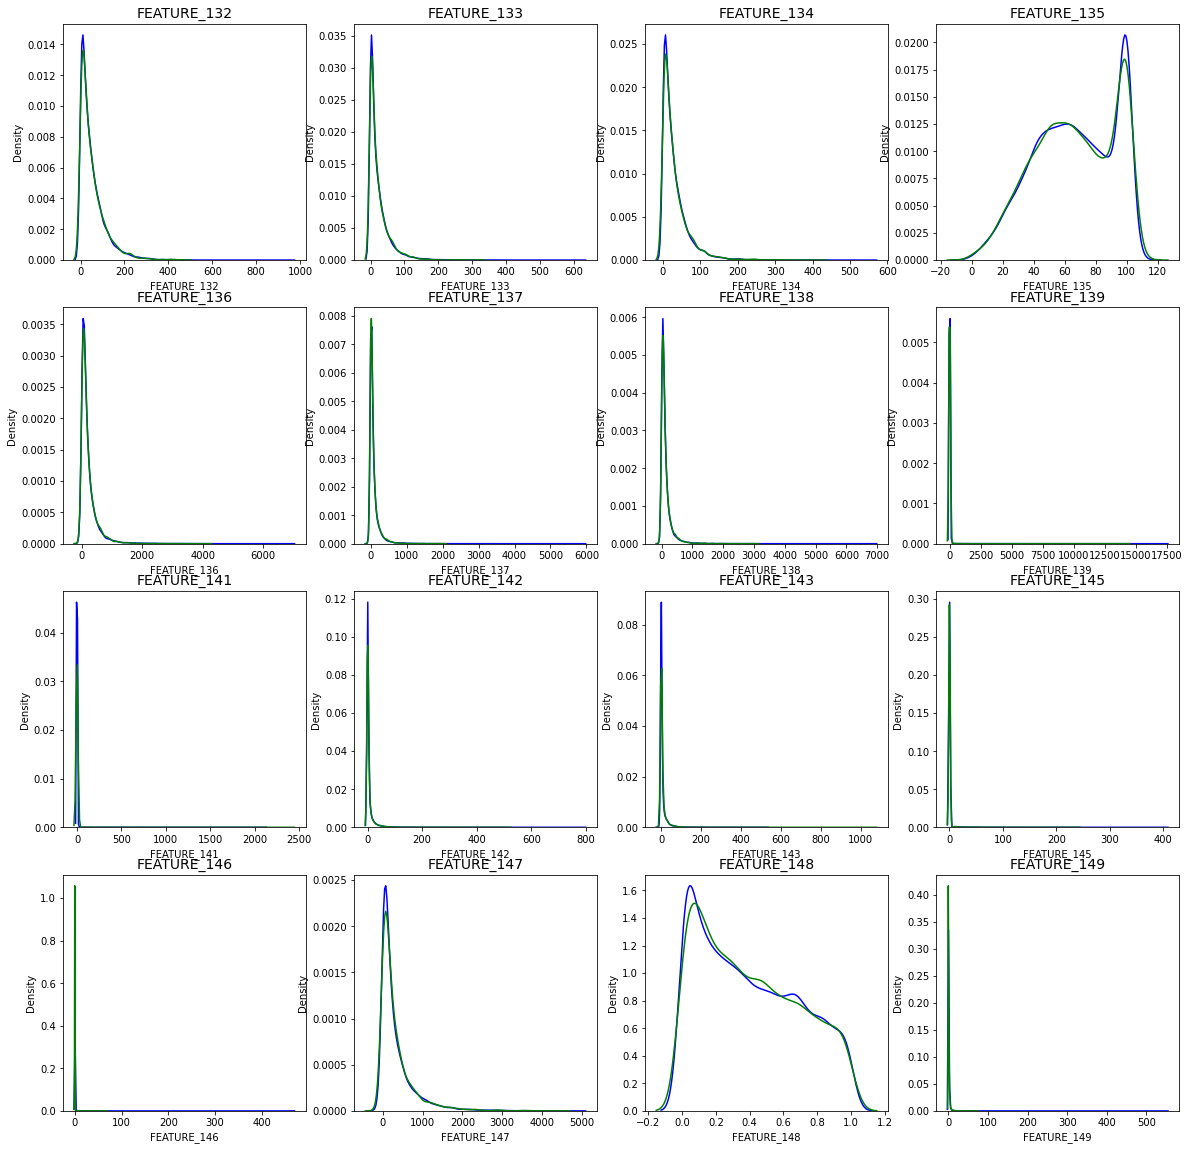

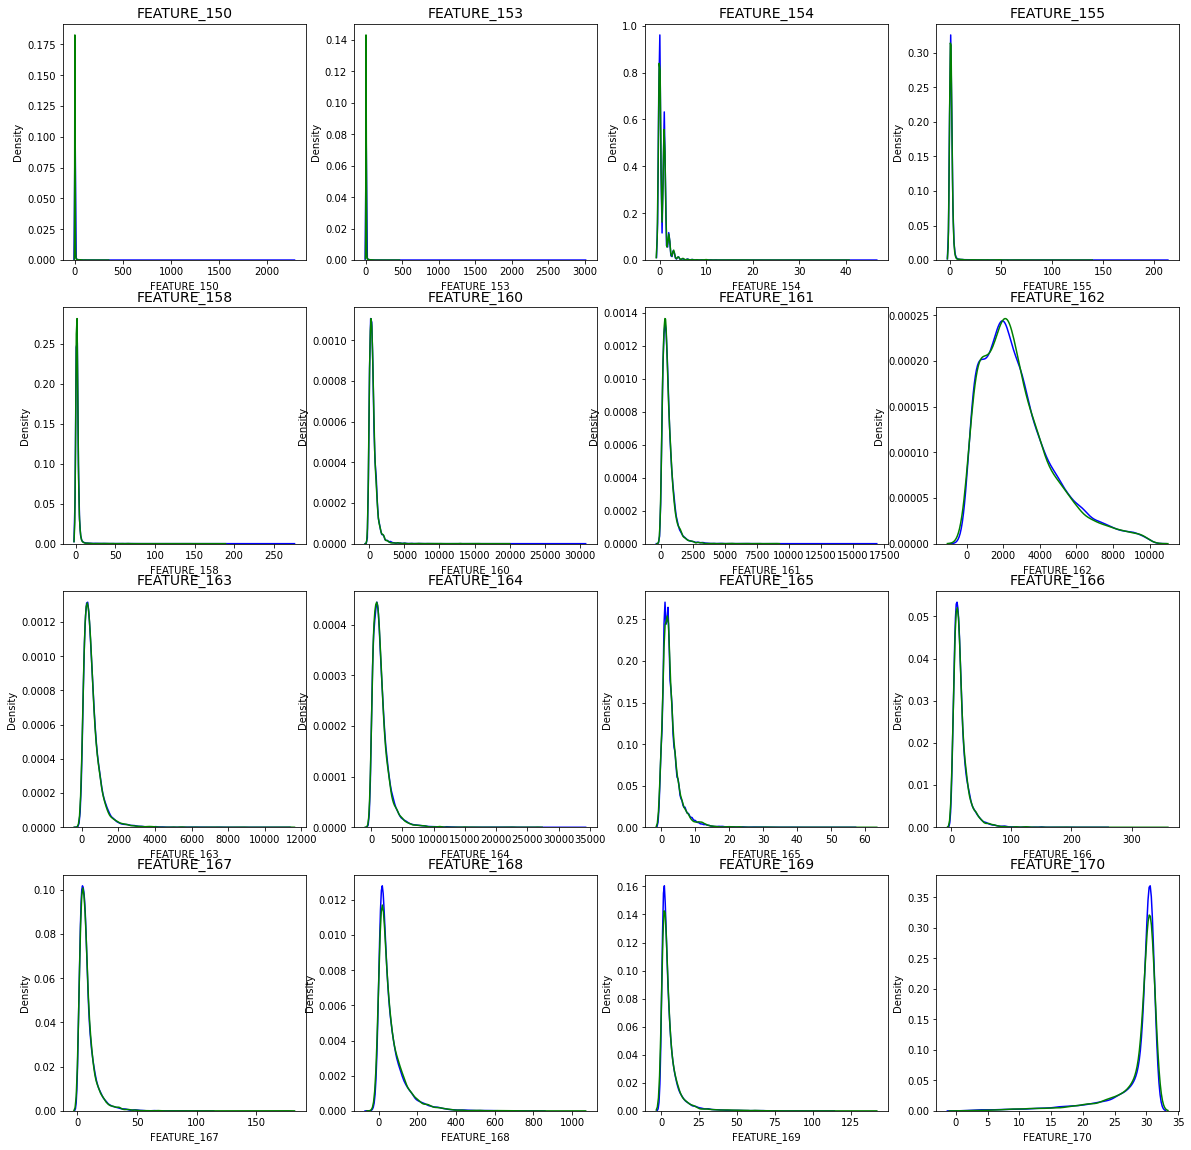

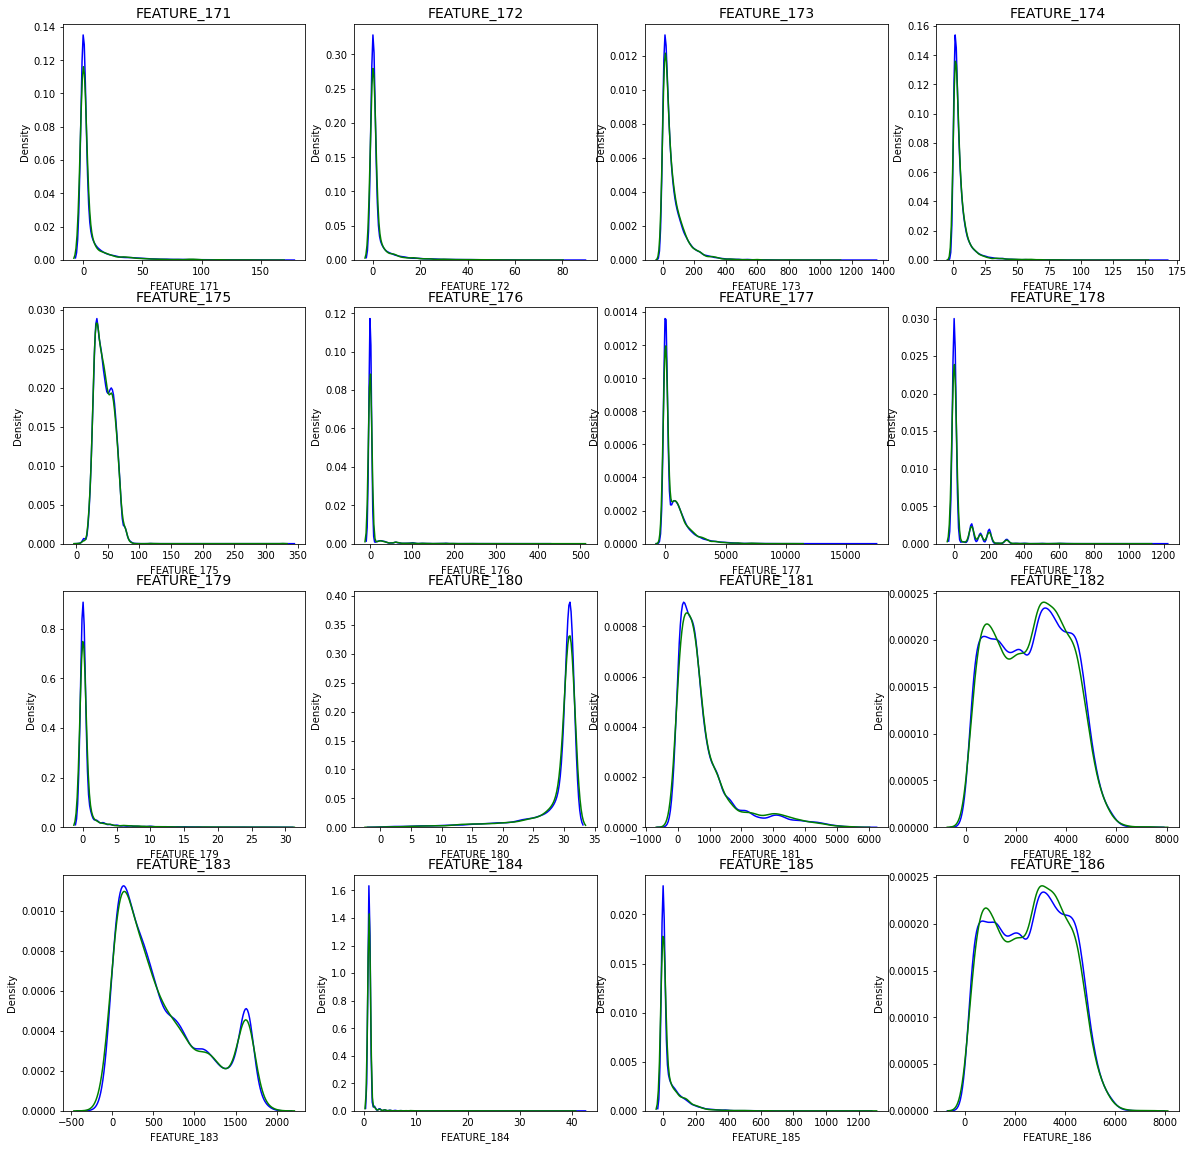

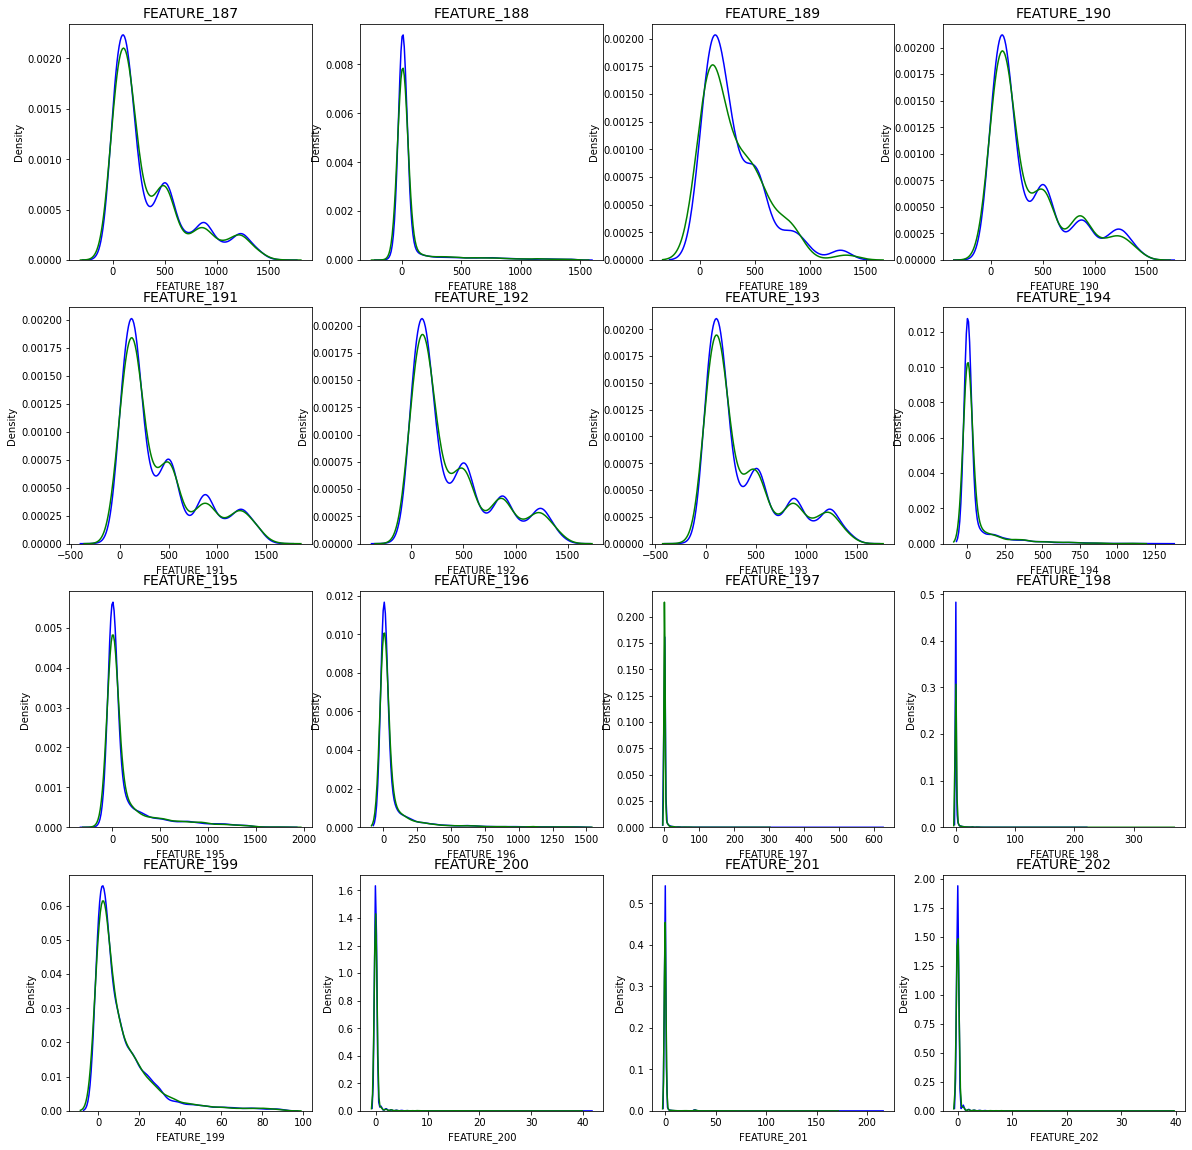

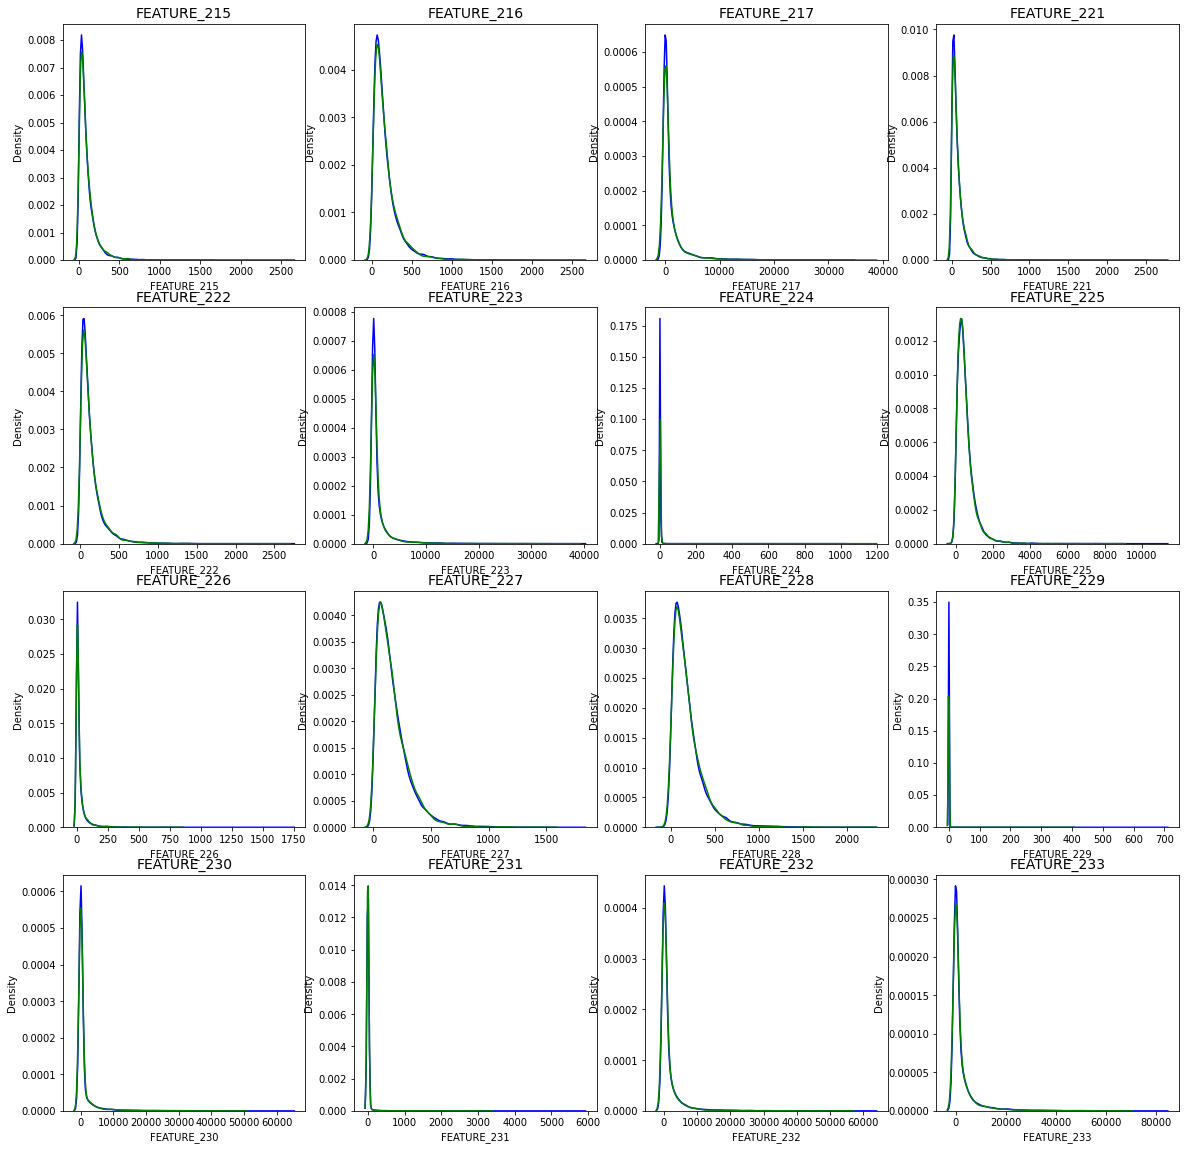

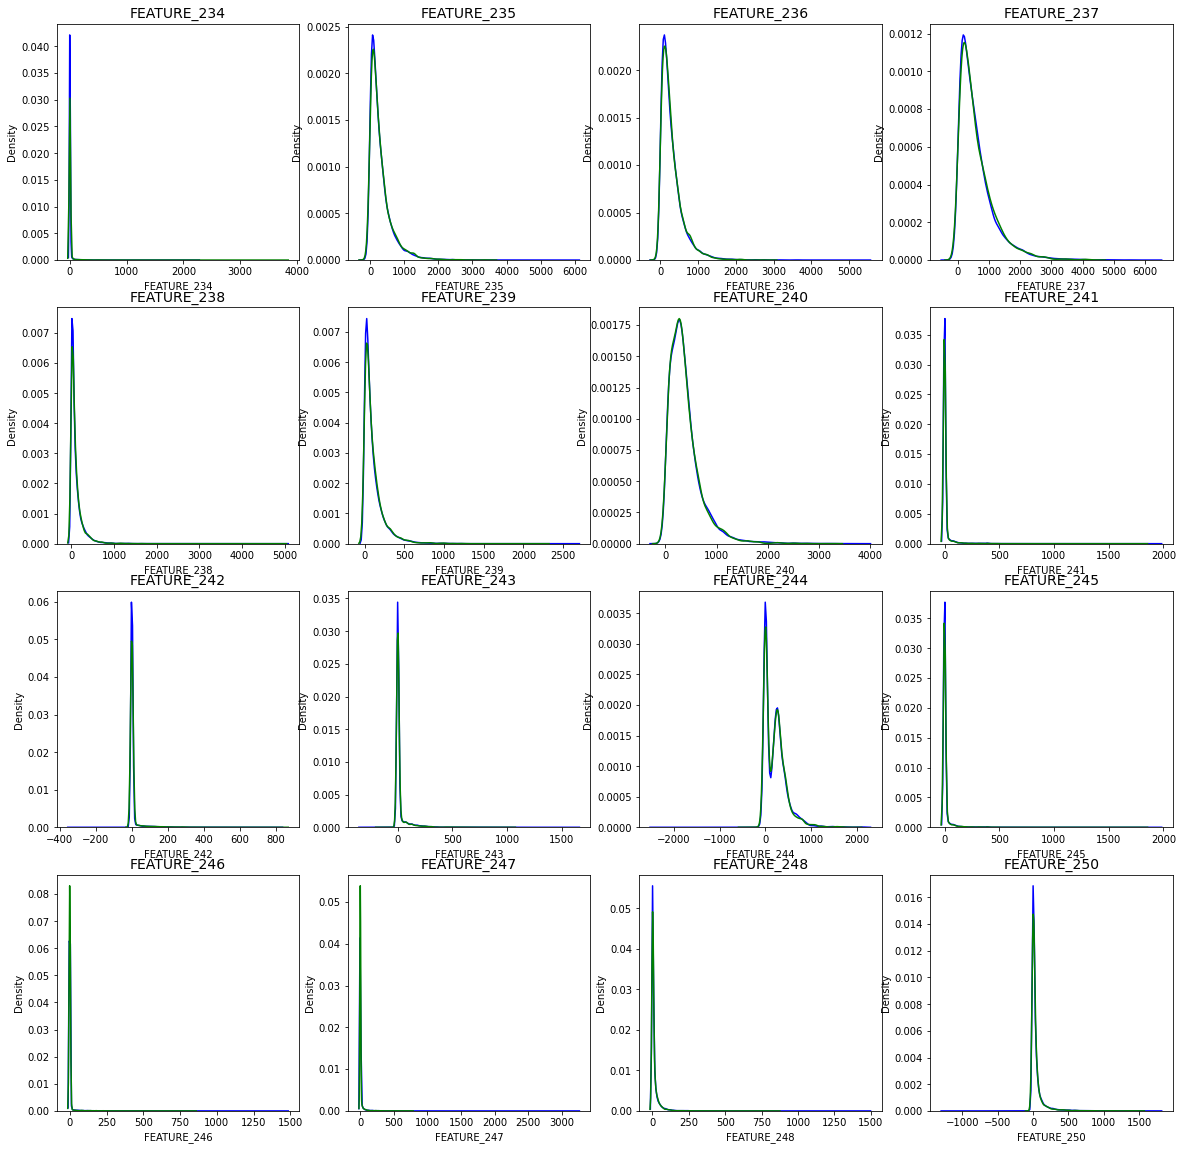

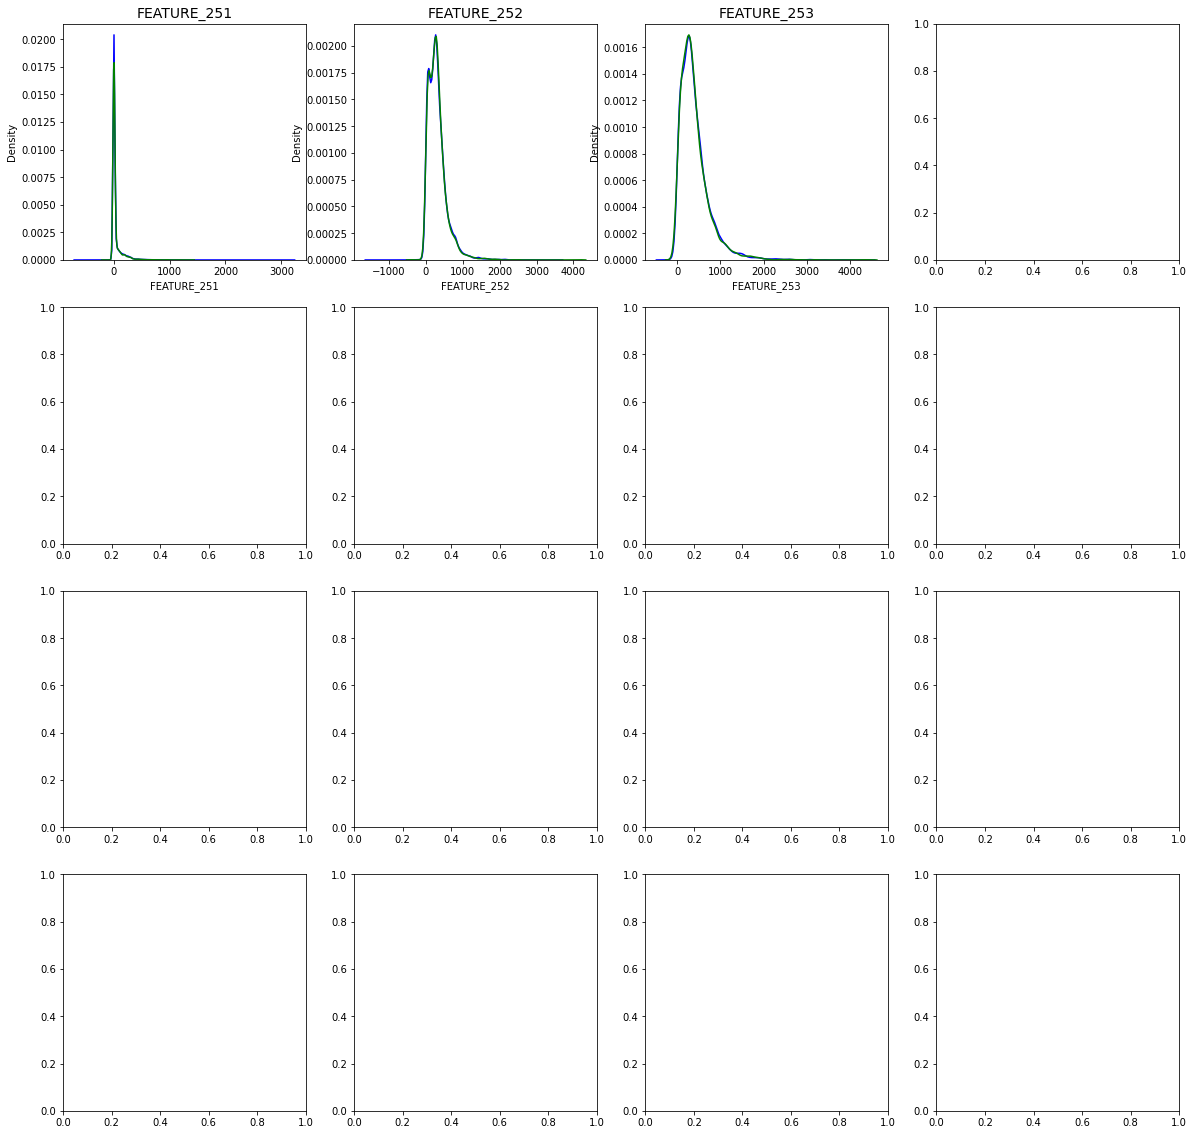

In [51]:
# распределение фичей на трейне и на тесте. 
for i in range(14):
    fig, axes = plt.subplots(4, 4, figsize=(20, 20))

    for num, feature in enumerate(train_con.iloc[:, i*16:(i+1)*16]):
        try:
            train_data, test_data = train[feature].copy(), test[feature].copy()
            sns.kdeplot(train_data, ax=axes[num//4, num%4], color="blue", label="train")
            sns.kdeplot(test_data, ax=axes[num//4, num%4], color="green", label="test")
        except RuntimeError:
            pass
        except KeyError:
            train_data = train[feature].copy()
            sns.kdeplot(train_data, ax=axes[num//4, num%4], color="blue", label="train")
        axes[num//4, num%4].set_title(feature, fontsize=14)

## Корреляция между числовыми признаками

In [52]:
correlation = numerical_features.corr()
corr_with_target = correlation["TARGET"].sort_values(ascending = False)
corr_with_target

TARGET         1.000000
FEATURE_74     0.180339
FEATURE_203    0.176312
FEATURE_254    0.174620
FEATURE_206    0.172235
                 ...   
FEATURE_69    -0.247884
FEATURE_3           NaN
FEATURE_144         NaN
FEATURE_249         NaN
FEATURE_256         NaN
Name: TARGET, Length: 262, dtype: float64

c:\users\anatoly\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\anatoly\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

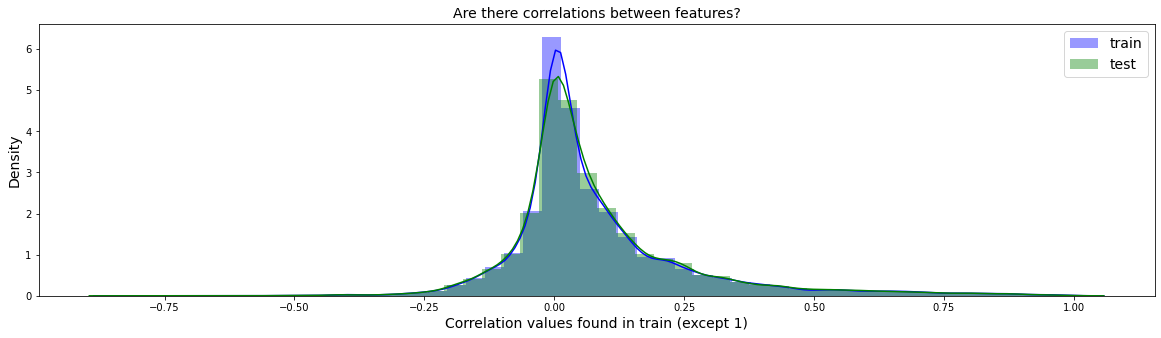

In [53]:
train_correlations = numerical_features.corr()
train_correlations = train_correlations.values.flatten()
train_correlations = train_correlations[train_correlations != 1]

columns = numerical_features.columns.tolist()
columns.remove("TARGET")

test_correlations = test[columns].corr()
test_correlations = test_correlations.values.flatten()
test_correlations = test_correlations[test_correlations != 1]

plt.figure(figsize=(20,5))
sns.distplot(train_correlations, color="Blue", label="train")
sns.distplot(test_correlations, color="Green", label="test")

plt.xlabel("Correlation values found in train (except 1)", size=14)
plt.title("Are there correlations between features?", size=14)
plt.legend(loc="best", fontsize=14)
plt.ylabel("Density", size=14)

## Correlation with heatmap

<AxesSubplot:title={'center':'Correlation of Numeric Features with Target'}>

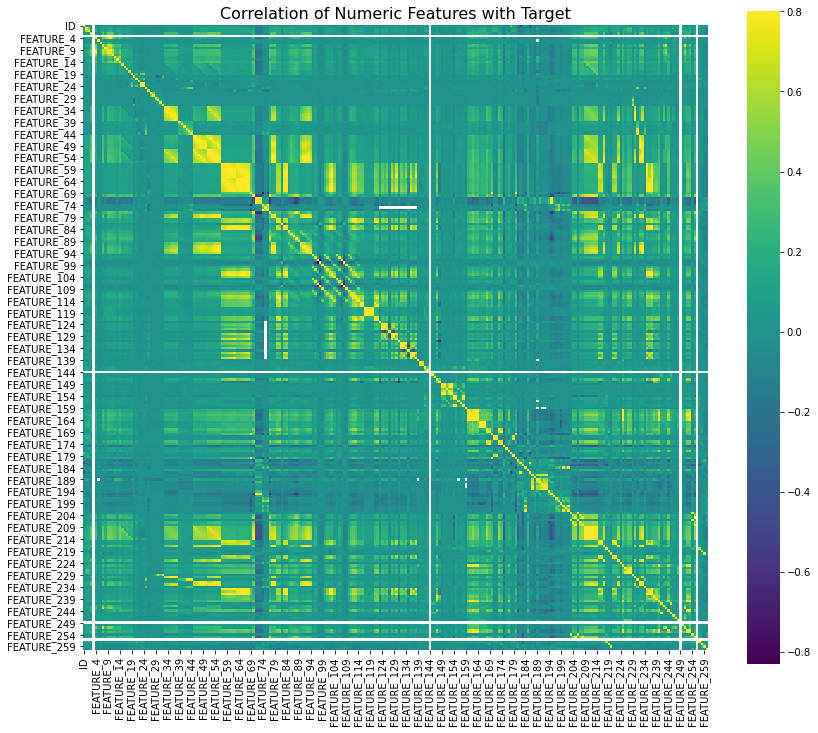

In [55]:
fig, axes = plt.subplots(figsize = (14,12))
plt.title("Correlation of Numeric Features with Target", y=1, size=16)
sns.heatmap(correlation, square=True, vmax=0.8, cmap="viridis")

<AxesSubplot:>

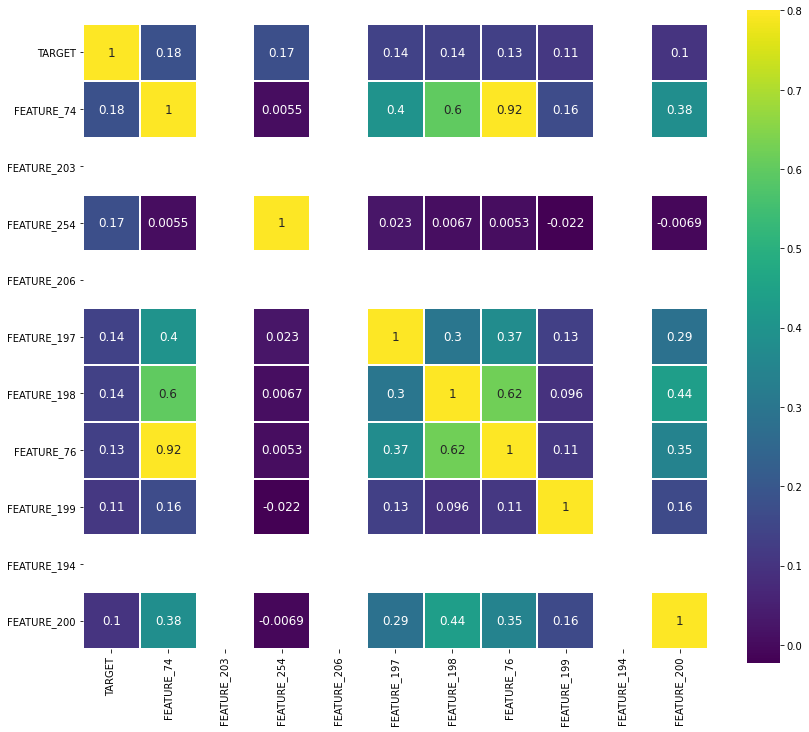

In [56]:
k = 11
cols = correlation.nlargest(k, "TARGET")["TARGET"].index
cm = np.corrcoef(train[cols].values.T)
fig, axes = plt.subplots(figsize = (14, 12))

sns.heatmap(
    cm,
    vmax=.8,
    linewidths=0.01,
    cmap="viridis",
    square=True,
    annot=True,
    linecolor="white",
    xticklabels=cols.values,
    annot_kws = {"size": 12},
    yticklabels=cols.values
)

`Выводы:` 

    - линейные корреляций с таргетом есть, они слабые.
    - есть корреляции между самими фичами. Являются ли они статистически значимыми? Большой вопрос. 

## Нелинейная связь между признаками

Коэффициент корреляции позволяет установить линейную силу связи между признаками, но также признаки могут быть связаны нелинейно, что сложно определяется коэффициентом корреляции: может быть ситуация, что признаки очень сильно связаны между собой, но коэффициент корреляции равен 0. 

Для начала давайте воспользуемся случайным лесом, чтобы выбрать 10 наиболее значимых признаков. Они могут служить отправной точкой для понимания природы данных и общего понимания данные. Кроме того, они могут дать некоторые идеи о том, как создавать новые признаки. 

In [57]:
target = train.TARGET

In [58]:
%%time
parameters = {"max_depth": 6, "n_estimators": 25, "random_state": 27, "n_jobs": 2}

forest = RandomForestRegressor(**parameters)
forest.fit(numerical_features.fillna(-9999).drop("TARGET", axis=1), target)

Wall time: 22.3 s


RandomForestRegressor(max_depth=6, n_estimators=25, n_jobs=2, random_state=27)

Text(0.5, 1.0, 'What are the top important features to start with?')

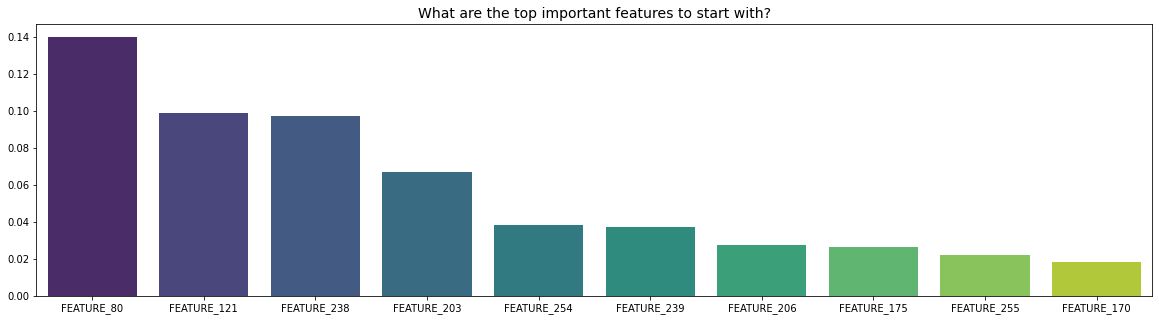

In [59]:
n_top = 10
importances = forest.feature_importances_
idx = np.argsort(importances)[::-1][0:n_top]
feature_names = numerical_features.drop("TARGET", axis=1).columns

plt.figure(figsize=(20, 5))
sns.barplot(x=feature_names[idx], y=importances[idx], palette="viridis")
plt.title("What are the top important features to start with?", size=14)

## Анализ распределения на обучении и тесте

Совпадение распределений на выборке для обучения и для тестирования - одна из ключевых коцепций статистического обучения. Обучая модель на некоторых данных, мы принимаем гипотезу о том, что модель должна работать на таких же данных.

## Kolmogorov-Smirnov Test

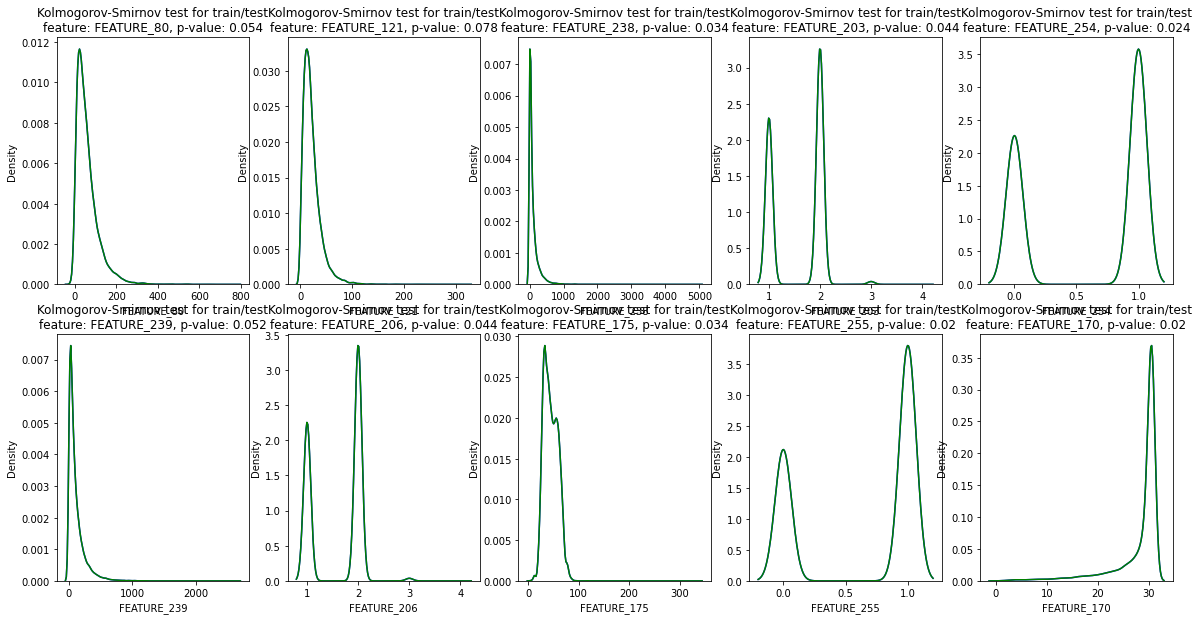

In [60]:
statistics_array = []
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for num, feature in enumerate(feature_names[idx]):
    statistic, pvalue = ks_2samp(
        train[feature].sample(500), test[feature].sample(500)
    )
    statistics_array.append(statistic)

    sns.kdeplot(train[feature], ax=axes[num//5, num%5], color="Blue", label="Train")
    sns.kdeplot(train[feature], ax=axes[num//5, num%5], color="Green", label="Test")

    axes[num//5, num%5].set_title(
        (f"Kolmogorov-Smirnov test for train/test\n"
        f"feature: {feature}, p-value: {round(statistic, 3)}")
    )

In [61]:
features_to_score = numerical_features.drop(["ID", "TARGET"], axis=1).columns.tolist()

## Adversarial validation

In [62]:
X_adv = pd.concat([
    train[features_to_score], test[features_to_score]
])
y_adv = np.hstack(
    (np.ones(train.shape[0]), np.zeros(test.shape[0])))

X_adv = X_adv.reset_index(drop=True)

In [63]:
%%time
parameters = {"max_depth": 4, "n_estimators": 50, "random_state": 27, "n_jobs": 2}
model = xgb.XGBClassifier(**parameters)

cv = cross_val_score(
    estimator=model,
    X=X_adv, y=y_adv,
    scoring="roc_auc",
    cv=KFold(n_splits=3, shuffle=True, random_state=27)
)
print(f"CV-score: {round(np.mean(cv), 4)}")

c:\users\anatoly\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:18:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\anatoly\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:18:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\anatoly\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:18:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CV-score: 0.5025
Wall time: 1min


c:\users\anatoly\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Text(0.5, 1.0, 'Top Importance Features for Adversarial Validation (train vs test)')

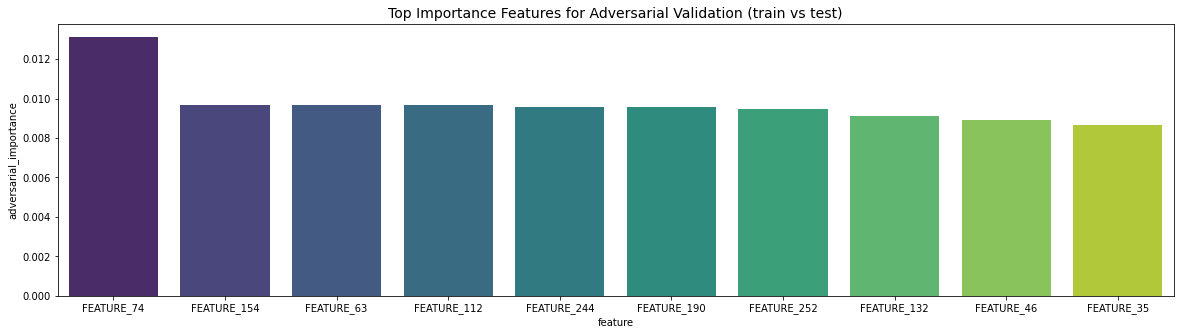

In [64]:
model.fit(X_adv, y_adv)

importance = pd.DataFrame({
    "feature": X_adv.columns,
    "adversarial_importance": model.feature_importances_
})
importance = importance.sort_values(by="adversarial_importance", ascending=False)
importance = importance.head(n=10)

plt.figure(figsize=(20, 5))
sns.barplot(x=importance["feature"], y=importance["adversarial_importance"], palette="viridis")
plt.title("Top Importance Features for Adversarial Validation (train vs test)", size=14)